<a href="https://colab.research.google.com/github/artturner/SDS-CP008-superstore-customer-segmentation/blob/main/Art_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Let's see more of the data

In [4]:
pd.set_option('display.max_columns',50)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


List all Features and provide a definition

*   Row ID. Row number.
*   Order ID.
*   Order Date
*   Ship Date
*   Ship Mode: Class- First, Second...
*   Customer ID
*   Customer Segment
*   Country
*   City
*   State
*   Postal Code
*   Region
*   Product ID
*   Category
*   Sub-Category
*   Product Name
*   Sales - Total Price of products sold
*   Quantity - Number of items sold
*   Discount - Represents the rate applied at the order level?
*   Profit

In [5]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


In [6]:
df.shape

(9994, 21)

## Check for missing values

In [7]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Check for duplicates

In [8]:
df.duplicated().sum()

0

## List data types

In [9]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


## Numerical Variables Analysis

In [10]:

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Calculate coefficient of varation (CV) / relative standard deviation (RSD)

In [11]:
profit_variance_co = (234.36/28.65)*100
print(profit_variance_co)

818.0104712041885


## Implications of high CV

This high CV (818%) indicates that the profit data has very high variability relative to its mean - the standard deviation is about 8.18 times the mean. This suggests:

* Profit values are highly dispersed
* There's significant volatility in profit numbers
* The mean alone might not be a good representative measure of the data

For business context, this high CV suggests that profits are quite unstable or inconsistent across transactions, which could warrant further investigation into:

* What causes some transactions to be highly profitable while others aren't
* Whether certain customer segments or product categories show more consistent profits
* If there are specific factors driving the high variability in profits

A more reasonable CV for profit in retail might be between 30-100%, though this varies by industry and business model. The very high CV here (818%) suggests this might be an area needing management attention.

## Dataframe composed of numerical variables

In [12]:
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


## Graph correlation of all numerical variables

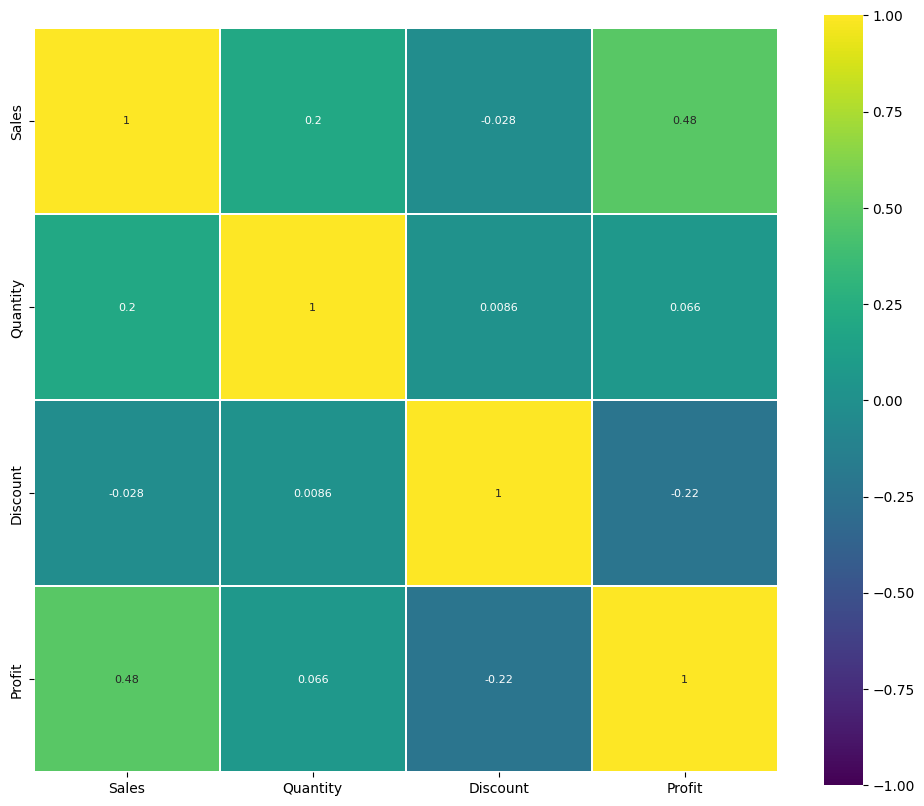

In [13]:

corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


The correlation heatmap indicates several meaningful relationships among the numeric variables (Sales, Quantity, Discount, and Profit):

1. Sales and Profit (Positive Correlation)
- Shows a positive but relatively weak-to-moderate correlation
- This makes sense: higher sales generally lead to higher profits
- The moderate strength suggests that profit margins vary significantly across transactions

2. Discount and Profit (Negative Correlation)
- Shows a notable negative correlation
- This is a key business insight: higher discounts are associated with lower profits
- Could indicate that discounting strategies need review as they may be cutting too deeply into profitability

3. Quantity and Sales (Positive Correlation)
- Shows a positive correlation
- Logical relationship: more items sold leads to higher sales
- The correlation isn't perfect, indicating price variation across products

4. Quantity and Profit
- Shows a weaker positive correlation
- Interesting business insight: selling more items doesn't necessarily translate to proportionally higher profits
- Could suggest that high-volume sales might be happening with lower-margin products

Business Recommendations based on these correlations:
1. Review discounting strategy - current approach appears to significantly impact profitability
2. Investigate high-volume, low-profit transactions to optimize pricing
3. Look for opportunities to push high-margin products in larger quantities
4. Consider focusing on increasing average transaction size while maintaining reasonable discounts



## Plot a SALES histogram

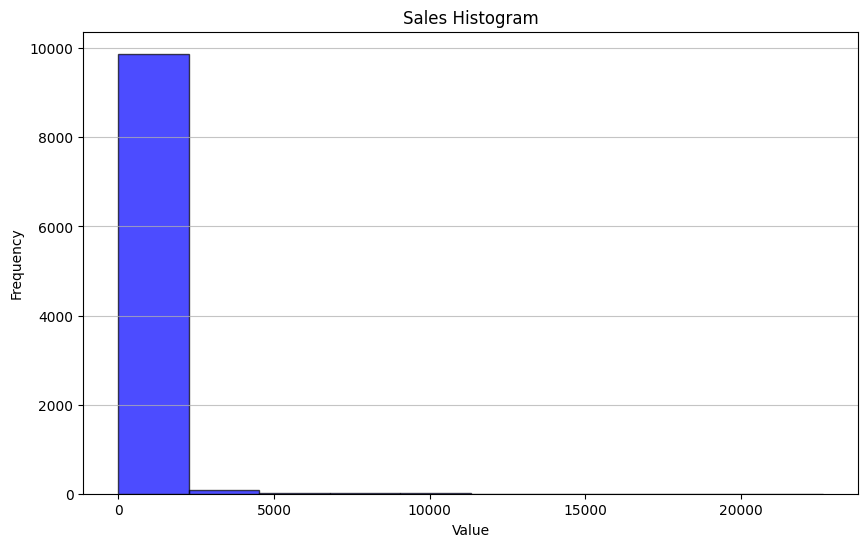

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Plot a DISCOUNT histogram

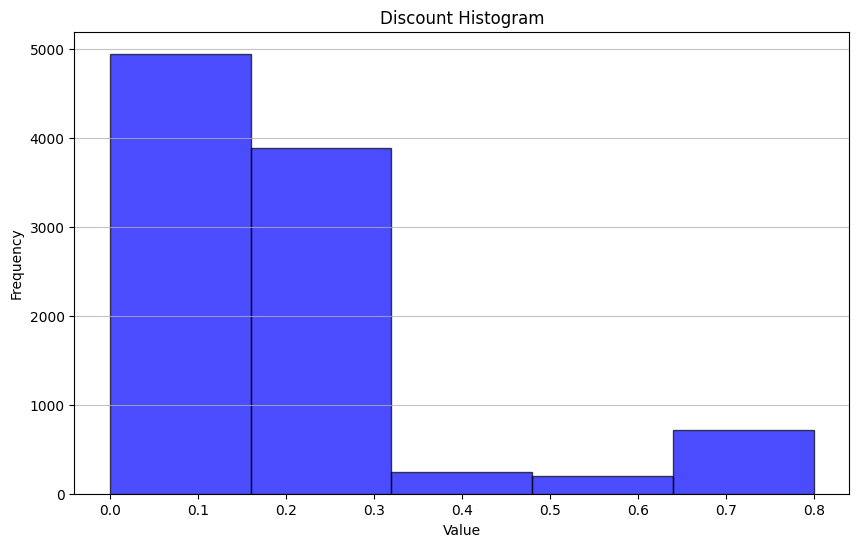

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Plot a QUANTITY histogram

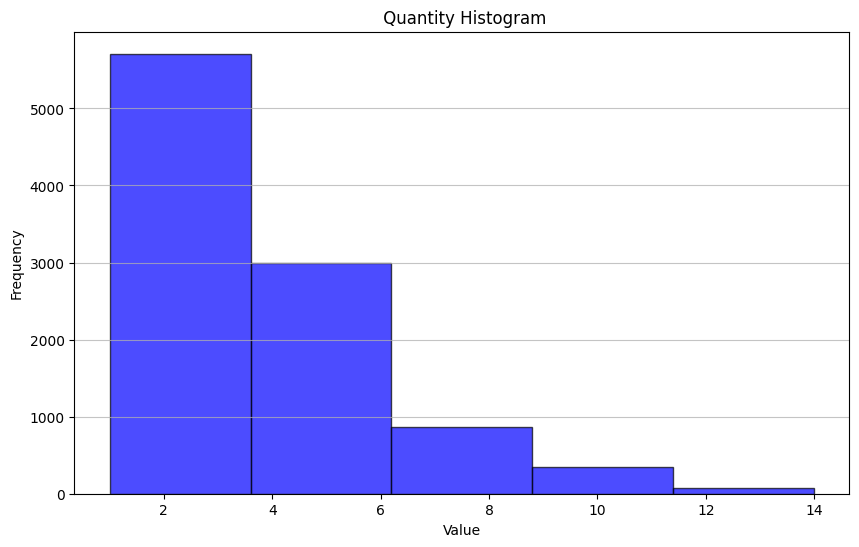

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Plot a PROFIT histogram

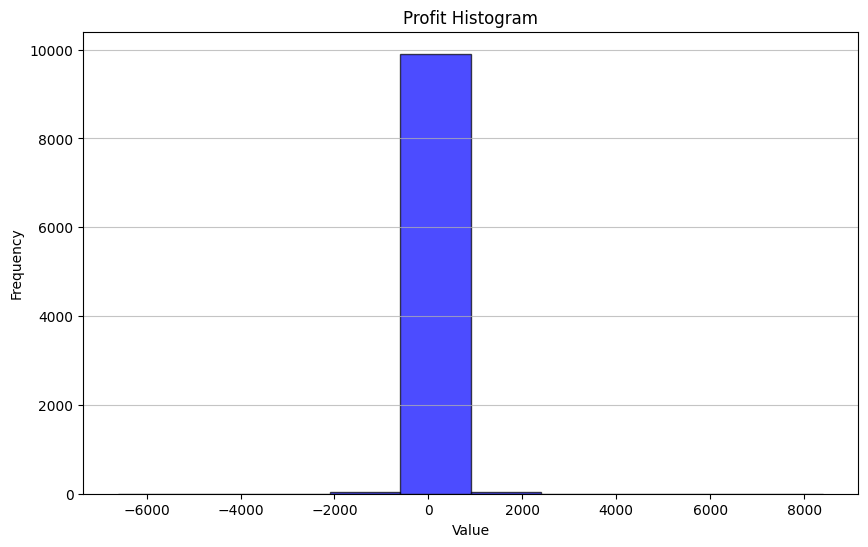

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Plot a PROFIT box plot

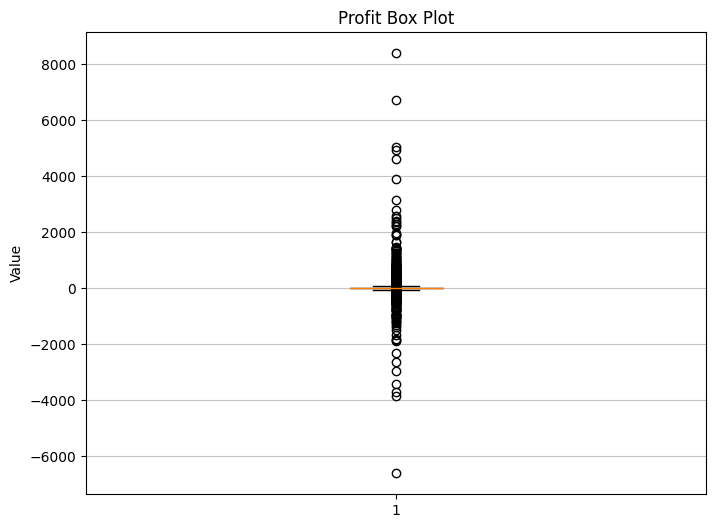

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

These visualizations reveal several important insights about the profit distribution:

### Distribution Shape (Histogram):
- Highly concentrated around zero
- Asymmetric with a long right tail (positively skewed)
- Shows most transactions generate relatively small profits
- A few transactions generate very high profits (outliers)
- Some transactions show losses (negative profits)

### Outliers (Box Plot):

Significant outliers in both directions

- Most extreme profit outlier is around +$8,000

- Most extreme loss outlier is around -$6,000

- Many outliers above $2,000 in profit

- Several notable losses below -$2,000

### Core Business Performance:
- The median profit (orange line in box plot) is slightly above zero
- Most transactions fall within a relatively narrow band around zero
- This suggests the core business operates on thin margins
- Risk of losses is significant, given the substantial negative outliers

# Business Implications:
## 1. Risk Management:
- Need to investigate what causes the extreme losses
- Understand what drives the highly profitable outlier transactions
- May want to implement controls to prevent large losses

## 2. Business Strategy:
- Consider focusing on replicating conditions that lead to high-profit outliers
- Need to understand why some transactions result in significant losses
- May want to review pricing and discount strategies for loss-making transactions

## 3. Operational Improvements:
- Look for ways to shift the overall distribution toward higher profits
- Consider eliminating or modifying products/services that consistently generate losses
- Develop strategies to increase the frequency of high-profit transactions

## Analysis of Categorical Variables

In [19]:
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [20]:
df['Country'].unique()

array(['United States'], dtype=object)

## Change date features to datetime data type

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

## ...and confirm

In [22]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


## Find number of unique customers and unique postal codes

In [23]:
df['Customer ID'].nunique(), df['Customer Name'].nunique()

(793, 793)

In [24]:
df['Postal Code'].nunique(), df['City'].nunique()

(631, 531)

## Drop redundant data and PII

In [25]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Recency, Frequency, Monetary (RFM) analysis

 Recency, Frequency, Monetary (RFM) analysis is a popular marketing and customer segmentation technique used in business to evaluate customer behavior and identify key customer groups. Will it work for SuperStore?

In [26]:

def calculate_rfm_scores(df, date_column='Order Date', customer_id='Customer ID',
                        sales_column='Sales'):
    """
    Calculate RFM (Recency, Frequency, Monetary) scores for each customer

    Parameters:
    -----------
    df : DataFrame
        Input DataFrame with customer transaction data
    date_column : str
        Name of the column containing transaction dates
    customer_id : str
        Name of the column containing customer IDs
    sales_column : str
        Name of the column containing transaction amounts

    Returns:
    --------
    DataFrame with RFM scores and segments
    """
    # Ensure date column is datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Calculate max date for recency calculation
    max_date = df[date_column].max()

    # Calculate RFM metrics
    rfm = df.groupby(customer_id).agg({
        date_column: lambda x: (max_date - x.max()).days,    # Recency
        'Order ID': 'count',                                 # Frequency
        sales_column: 'sum'                                  # Monetary
    }).reset_index()

    # Rename columns
    rfm.columns = [customer_id, 'Recency', 'Frequency', 'Monetary']

    # Create R, F, M quartile scores (1-4)
    rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3, 4])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])

    # Calculate RFM Score
    rfm['RFM_Score'] = (rfm['R_Score'].astype(str) +
                        rfm['F_Score'].astype(str) +
                        rfm['M_Score'].astype(str))

    # Segment customers based on RFM score
    def segment_customers(row):
        r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
        if r == 4 and f == 4 and m == 4:
            return 'Best Customers'
        elif (r >= 3) and (f >= 3) and (m >= 3):
            return 'Loyal Customers'
        elif (r >= 3) and (f >= 2) and (m >= 2):
            return 'Active Customers'
        elif (r >= 2) and (f >= 2) and (m >= 2):
            return 'Regular Customers'
        elif (r >= 2) and (f >= 1) and (m >= 1):
            return 'New Customers'
        else:
            return 'Lost Customers'

    rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

    return rfm

def validate_segments(rfm_df, features=['Recency', 'Frequency', 'Monetary']):
    """
    Perform comprehensive validation of the RFM segmentation

    Parameters:
    -----------
    rfm_df : DataFrame
        RFM DataFrame with segmentation results
    features : list
        List of feature columns used for validation

    Returns:
    --------
    Dictionary containing validation metrics and visualizations
    """
    # Standardize features for validation
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(rfm_df[features])

    # Calculate segment statistics
    segment_stats = rfm_df.groupby('Customer_Segment')[features].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)

    # Prepare visualization data
    plt.figure(figsize=(15, 10))

    # Plot segment characteristics
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=rfm_df, x='Customer_Segment', y=feature)
        plt.xticks(rotation=45)
        plt.title(f'{feature} Distribution by Segment')

    plt.tight_layout()


    return {
        'segment_stats': segment_stats,
        'segment_sizes': rfm_df['Customer_Segment'].value_counts(),
        'segment_proportions': rfm_df['Customer_Segment'].value_counts(normalize=True)
    }

def generate_segment_profiles(rfm_df, original_df):
    """
    Generate detailed profiles for each customer segment

    Parameters:
    -----------
    rfm_df : DataFrame
        RFM DataFrame with segmentation results
    original_df : DataFrame
        Original transaction DataFrame

    Returns:
    --------
    Dictionary containing segment profiles and recommendations
    """
    profiles = {}

    for segment in rfm_df['Customer_Segment'].unique():
        # Get customers in segment
        segment_customers = rfm_df[rfm_df['Customer_Segment'] == segment]['Customer ID']

        # Get segment transactions
        segment_txns = original_df[original_df['Customer ID'].isin(segment_customers)]

        # Calculate segment metrics
        profiles[segment] = {
            'customer_count': len(segment_customers),
            'average_order_value': segment_txns.groupby('Order ID')['Sales'].sum().mean(),
            'average_items_per_order': segment_txns.groupby('Order ID')['Quantity'].sum().mean(),
            'total_revenue': segment_txns['Sales'].sum(),
            'total_profit': segment_txns['Profit'].sum(),
            'profit_margin': (segment_txns['Profit'].sum() / segment_txns['Sales'].sum()) * 100,
            'average_discount': segment_txns['Discount'].mean() * 100,
            'top_categories': segment_txns.groupby('Category')['Sales'].sum().nlargest(3)
        }

    return profiles

def plot_segment_analysis(profiles):
    """
    Create visualization dashboard for segment analysis

    Parameters:
    -----------
    profiles : dict
        Dictionary containing segment profiles
    """
    plt.figure(figsize=(20, 12))

    # Plot 1: Customer Count by Segment
    plt.subplot(2, 2, 1)
    customer_counts = [p['customer_count'] for p in profiles.values()]
    plt.bar(profiles.keys(), customer_counts)
    plt.title('Customer Count by Segment')
    plt.xticks(rotation=45)

    # Plot 2: Average Order Value
    plt.subplot(2, 2, 2)
    aov = [p['average_order_value'] for p in profiles.values()]
    plt.bar(profiles.keys(), aov)
    plt.title('Average Order Value by Segment')
    plt.xticks(rotation=45)

    # Plot 3: Profit Margin
    plt.subplot(2, 2, 3)
    margins = [p['profit_margin'] for p in profiles.values()]
    plt.bar(profiles.keys(), margins)
    plt.title('Profit Margin by Segment')
    plt.xticks(rotation=45)

    # Plot 4: Average Discount
    plt.subplot(2, 2, 4)
    discounts = [p['average_discount'] for p in profiles.values()]
    plt.bar(profiles.keys(), discounts)
    plt.title('Average Discount by Segment')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

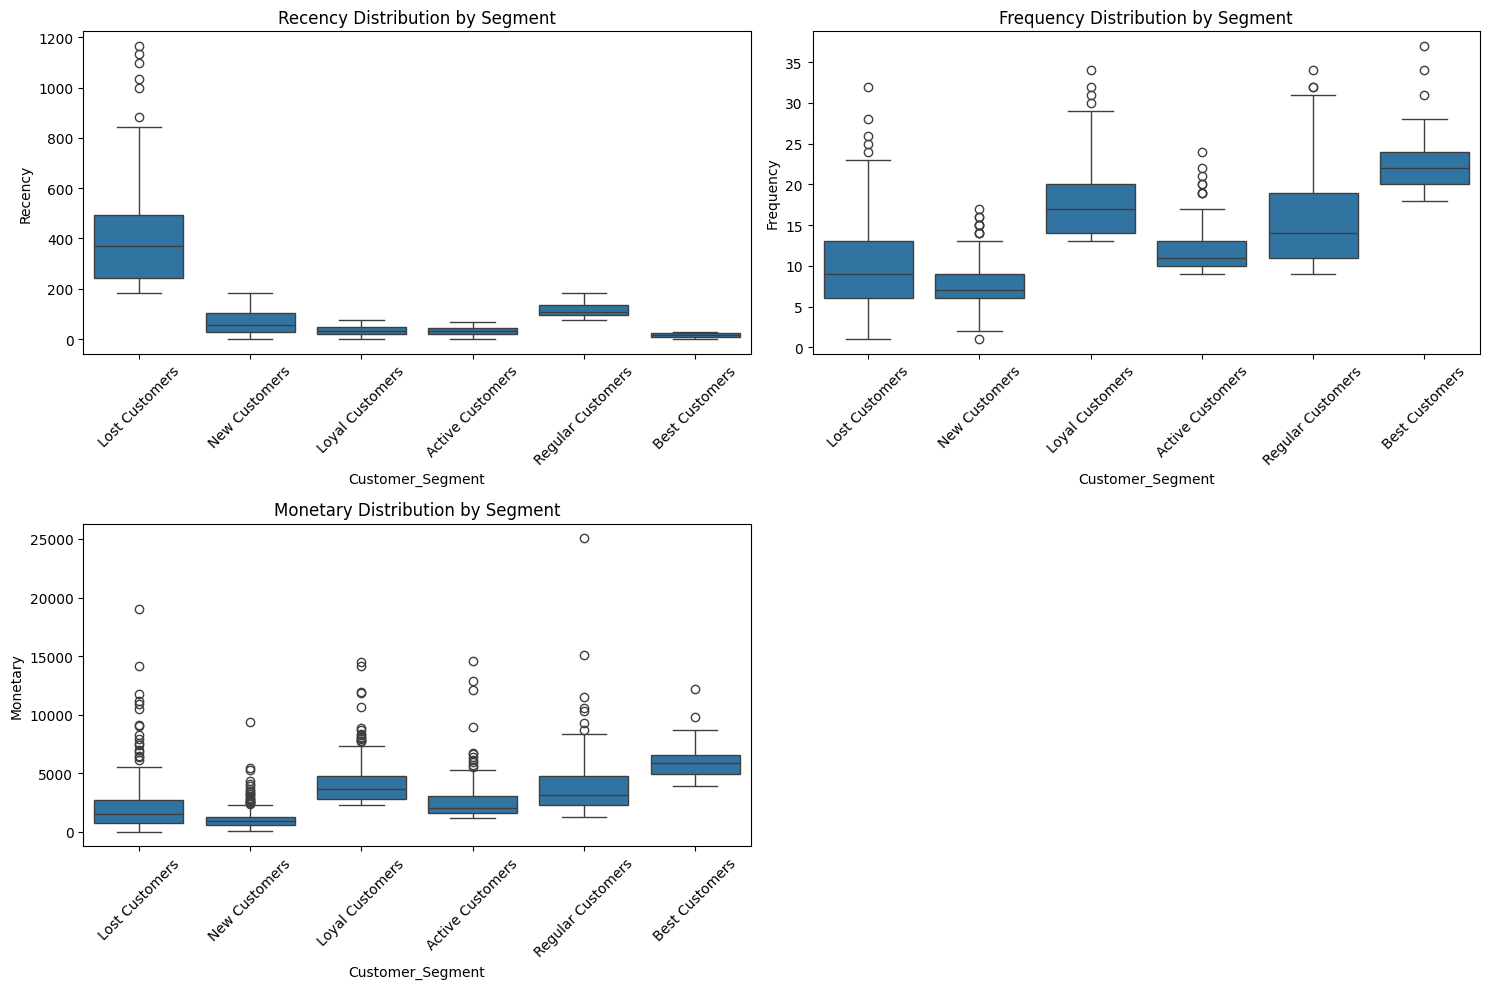

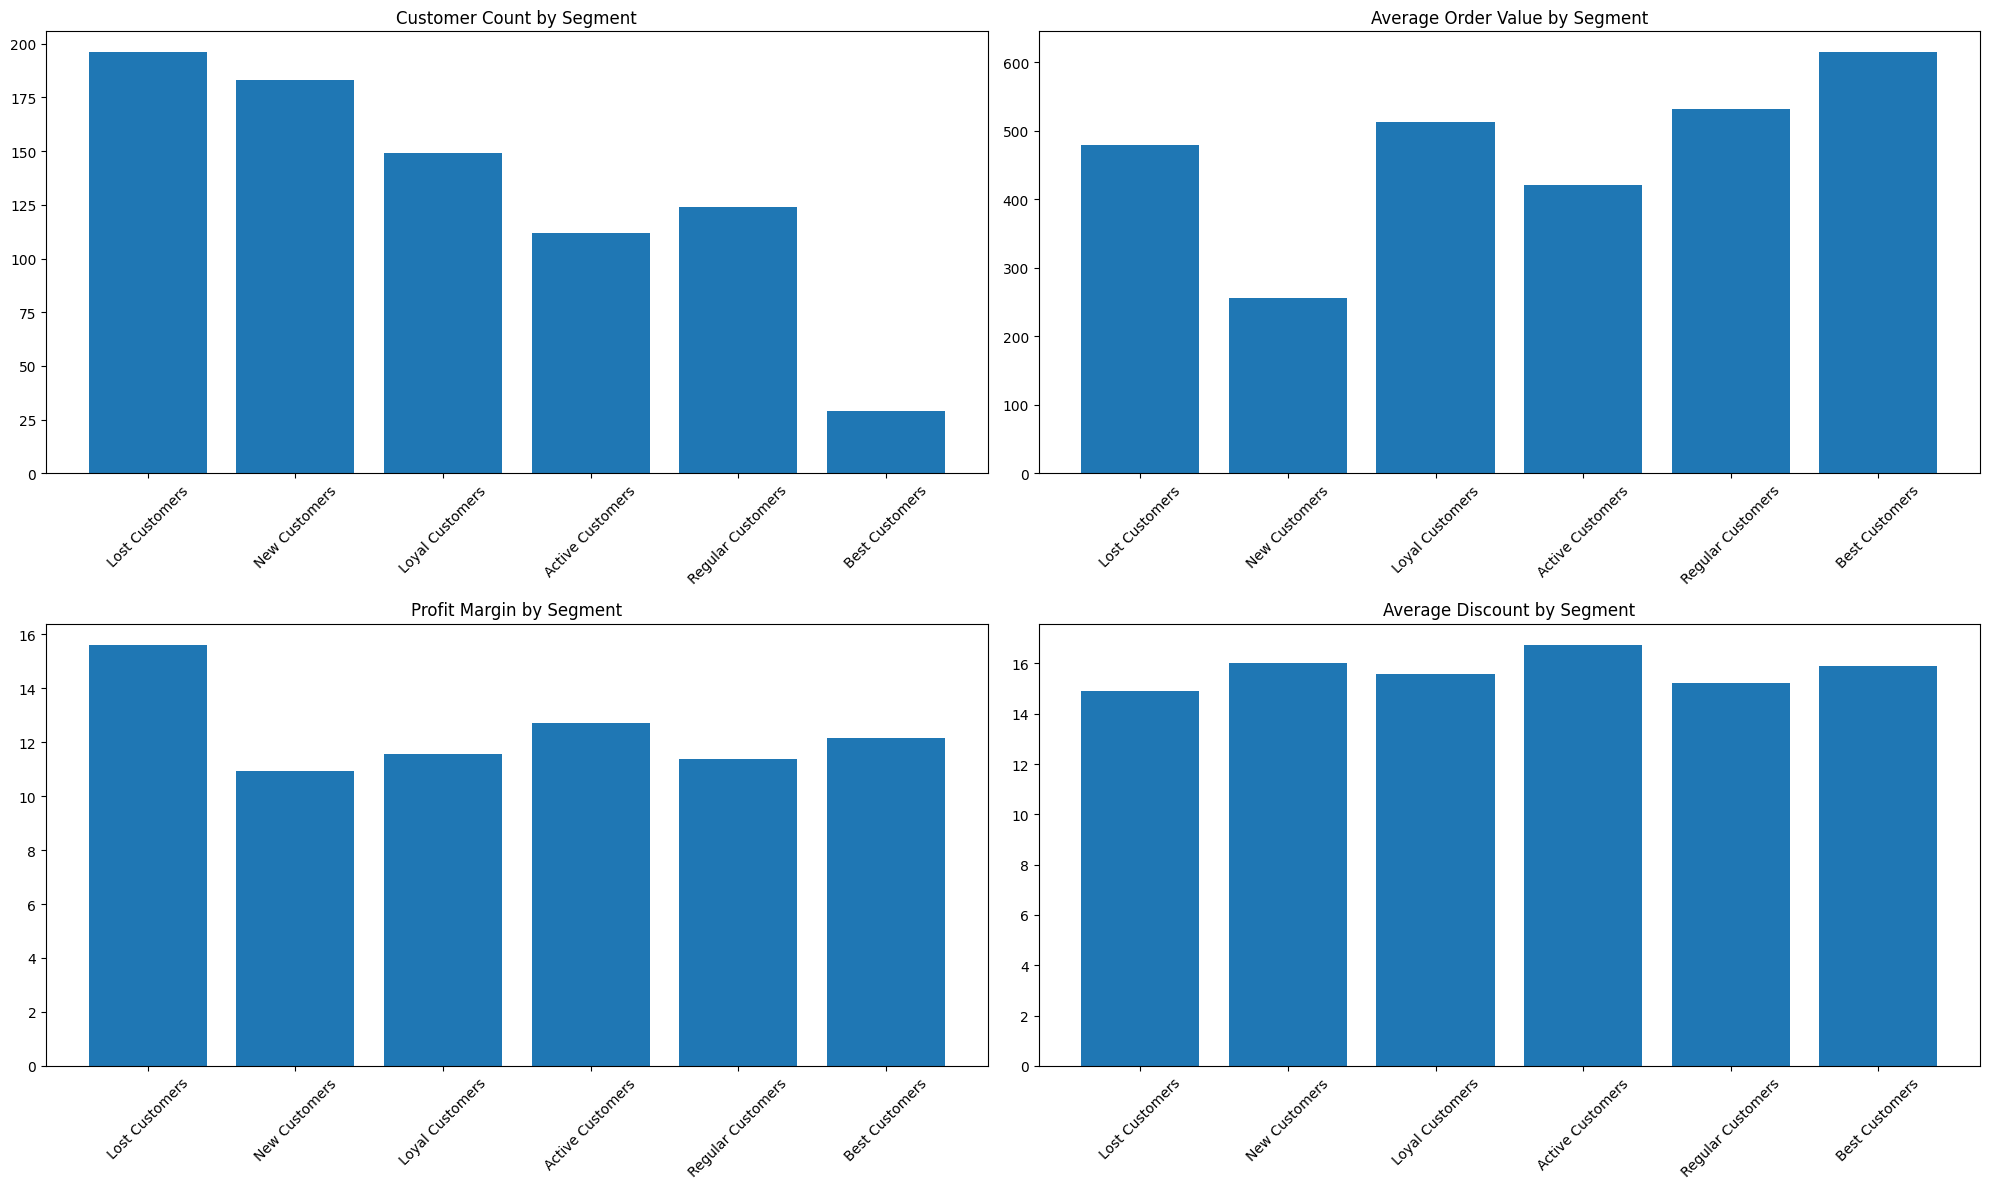

In [27]:
# Calculate RFM scores
rfm_df = calculate_rfm_scores(df)

# Validate the segmentation
validation_results = validate_segments(rfm_df)

# Generate detailed segment profiles
profiles = generate_segment_profiles(rfm_df, df)

# Visualize the results
plot_segment_analysis(profiles)

## Key Insights from Current Visualizations:

1. Customer Distribution:
- "Lost Customers" form the largest segment (~190 customers)
- "Best Customers" are the smallest but most valuable segment (~30 customers)
- Healthy middle tier of "Loyal" and "Regular" customers

2. Segment Characteristics:
- Best Customers show:
  * Highest average order value (~$600)
  * Highest frequency (20-25 orders)
  * Most consistent monetary value
  * Moderate discounts (~15%)

- Lost Customers show:
  * Surprisingly high profit margins (~15%)
  * High recency values (indicating long time since last purchase)
  * Variable frequency (5-15 orders)
  * Wide monetary value spread




## Create enhanced segment profiles

In [30]:
def create_enhanced_segment_profiles(df, rfm_df):
    """
    Create comprehensive segment profiles with additional metrics.
    Modified to handle categorical data properly.
    """
    profiles = {}

    # Convert dates to datetime if they aren't already
    if not pd.api.types.is_datetime64_any_dtype(df['Order Date']):
        df['Order Date'] = pd.to_datetime(df['Order Date'])

    for segment in rfm_df['Customer_Segment'].unique():
        # Get customers in segment
        segment_customers = rfm_df[rfm_df['Customer_Segment'] == segment]['Customer ID']
        segment_data = df[df['Customer ID'].isin(segment_customers)]

        # Basic Metrics
        profiles[segment] = {
            'size': {
                'customer_count': len(segment_customers),
                'customer_percentage': len(segment_customers) / len(rfm_df) * 100
            },

            'value_metrics': {
                'total_revenue': segment_data['Sales'].sum(),
                'total_profit': segment_data['Profit'].sum(),
                'revenue_per_customer': segment_data.groupby('Customer ID')['Sales'].sum().mean(),
                'profit_per_customer': segment_data.groupby('Customer ID')['Profit'].sum().mean(),
                'average_order_value': segment_data.groupby('Order ID')['Sales'].sum().mean(),
                'profit_margin': (segment_data['Profit'].sum() / segment_data['Sales'].sum()) * 100
            },

            'purchase_behavior': {
                'average_purchase_frequency': segment_data.groupby('Customer ID').size().mean(),
                'items_per_order': segment_data.groupby('Order ID')['Quantity'].sum().mean()
            }
        }

        # Calculate purchase intervals (handling dates properly)
        customer_intervals = []
        for customer in segment_customers:
            customer_orders = segment_data[segment_data['Customer ID'] == customer]['Order Date'].sort_values()
            if len(customer_orders) > 1:
                intervals = customer_orders.diff().dropna().dt.days
                customer_intervals.extend(intervals.tolist())

        if customer_intervals:
            profiles[segment]['purchase_behavior']['average_days_between_purchases'] = np.mean(customer_intervals)
        else:
            profiles[segment]['purchase_behavior']['average_days_between_purchases'] = 0

        # Category preferences (handling categorical data)
        category_sales = segment_data.groupby('Category')['Sales'].sum()
        profiles[segment]['category_preferences'] = {
            'top_categories': dict(category_sales.nlargest(3)),
            'category_distribution': dict(category_sales / category_sales.sum() * 100)
        }

        # Pricing sensitivity
        profiles[segment]['pricing_sensitivity'] = {
            'average_discount': segment_data['Discount'].mean() * 100,
            'discount_frequency': (segment_data['Discount'] > 0).mean() * 100,
            'profit_with_discount': segment_data[segment_data['Discount'] > 0]['Profit'].mean(),
            'profit_without_discount': segment_data[segment_data['Discount'] == 0]['Profit'].mean()
        }

        # Loyalty metrics
        customer_lifespans = []
        for customer in segment_customers:
            customer_orders = segment_data[segment_data['Customer ID'] == customer]['Order Date']
            if len(customer_orders) > 0:
                lifespan = (customer_orders.max() - customer_orders.min()).days
                customer_lifespans.append(lifespan)

        profiles[segment]['loyalty_metrics'] = {
            'average_customer_lifespan': np.mean(customer_lifespans) if customer_lifespans else 0,
            'repeat_purchase_rate': len(segment_data[segment_data.duplicated('Customer ID', keep=False)]) / len(segment_data)
        }

    return profiles

def display_segment_profiles(profiles):
    """
    Display formatted segment profiles
    """
    for segment, profile in profiles.items():
        print(f"\n{'='*80}")
        print(f"\n🎯 SEGMENT: {segment}")
        print(f"{'='*80}")

        # Size and Value
        print("\n📊 SIZE & VALUE")
        print(f"Number of Customers: {profile['size']['customer_count']:,}")
        print(f"Percentage of Total: {profile['size']['customer_percentage']:.1f}%")
        print(f"Total Revenue: ${profile['value_metrics']['total_revenue']:,.2f}")
        print(f"Total Profit: ${profile['value_metrics']['total_profit']:,.2f}")
        print(f"Average Order Value: ${profile['value_metrics']['average_order_value']:,.2f}")
        print(f"Profit Margin: {profile['value_metrics']['profit_margin']:.1f}%")

        # Purchase Behavior
        print("\n🛍️ PURCHASE BEHAVIOR")
        print(f"Average Orders per Customer: {profile['purchase_behavior']['average_purchase_frequency']:.1f}")
        print(f"Average Items per Order: {profile['purchase_behavior']['items_per_order']:.1f}")
        print(f"Average Days Between Purchases: {profile['purchase_behavior']['average_days_between_purchases']:.1f}")

        # Category Performance
        print("\n📦 CATEGORY PERFORMANCE")
        for cat, sales in profile['category_preferences']['top_categories'].items():
            print(f"{cat}: ${sales:,.2f}")

        # Pricing Sensitivity
        print("\n💰 PRICING SENSITIVITY")
        print(f"Average Discount: {profile['pricing_sensitivity']['average_discount']:.1f}%")
        print(f"Discount Usage Rate: {profile['pricing_sensitivity']['discount_frequency']:.1f}%")
        print(f"Average Profit with Discount: ${profile['pricing_sensitivity']['profit_with_discount']:.2f}")
        print(f"Average Profit without Discount: ${profile['pricing_sensitivity']['profit_without_discount']:.2f}")

        # Loyalty Metrics
        print("\n🎯 LOYALTY METRICS")
        print(f"Average Customer Lifespan: {profile['loyalty_metrics']['average_customer_lifespan']:.0f} days")
        print(f"Repeat Purchase Rate: {profile['loyalty_metrics']['repeat_purchase_rate']:.1%}")

# Use the functions
profiles = create_enhanced_segment_profiles(df, rfm_df)
display_segment_profiles(profiles)



🎯 SEGMENT: Lost Customers

📊 SIZE & VALUE
Number of Customers: 196
Percentage of Total: 24.7%
Total Revenue: $456,859.36
Total Profit: $71,313.53
Average Order Value: $478.89
Profit Margin: 15.6%

🛍️ PURCHASE BEHAVIOR
Average Orders per Customer: 10.0
Average Items per Order: 7.9
Average Days Between Purchases: 83.8

📦 CATEGORY PERFORMANCE
Technology: $161,981.82
Office Supplies: $151,640.71
Furniture: $143,236.82

💰 PRICING SENSITIVITY
Average Discount: 14.9%
Discount Usage Rate: 49.8%
Average Profit with Discount: $-3.11
Average Profit without Discount: $75.49

🎯 LOYALTY METRICS
Average Customer Lifespan: 756 days
Repeat Purchase Rate: 99.8%


🎯 SEGMENT: New Customers

📊 SIZE & VALUE
Number of Customers: 183
Percentage of Total: 23.1%
Total Revenue: $217,843.11
Total Profit: $23,817.11
Average Order Value: $256.29
Profit Margin: 10.9%

🛍️ PURCHASE BEHAVIOR
Average Orders per Customer: 7.6
Average Items per Order: 6.0
Average Days Between Purchases: 147.4

📦 CATEGORY PERFORMANCE
Tec

## Key insights about each segment:

**1. Best Customers (3.7% of base):**
- Highest purchase frequency (22.8 orders/customer)
- Shortest purchase interval (56.2 days)
- Highest average order value ($614.32)

- Longest customer lifespan (1225 days)
- Strong technology preference ($72K vs $57K furniture)

**2. Lost Customers (24.7% of base):**
- Surprisingly high profit margin (15.6%)
- Good average order value ($478.89)
- Long intervals between purchases (83.8 days)
- Shortest lifespan (756 days)
- Even category distribution

**3. Loyal Customers (18.8%):**

- Highest total revenue ($636,936)

- Strong furniture preference
- Good purchase frequency (17.9 orders)
- Short purchase interval (68.8 days)
- High order value ($513.24)

**4. New Customers (23.1%):**
- Lowest average order value ($256.29)
- Longest purchase interval (147.4 days)
- Lowest profit margin (10.9%)
- Lowest orders per customer (7.6)
- Even category distribution

## Key Patterns Across Segments:
**1. Discount Impact:**
- All segments show negative profit with discounts
- Discount usage rate fairly consistent (49-54%)
- Average discount range narrow (14.9-16.7%)

**2. Category Preferences:**
- Technology leads in 4/6 segments
- Furniture leads in Loyal Customers
- Office Supplies consistently third

**3. Customer Value:**
- Clear correlation between purchase frequency and order value
- Higher frequency segments show shorter purchase intervals
- Longer lifespans correlate with better segment performance


## More Segment Analysis


🎯 SEGMENTATION VALIDATION METRICS
Silhouette Score: 0.185
Davies-Bouldin Score: 1.313
Calinski-Harabasz Score: 245.033

Interpretation:
- Silhouette Score: Range [-1, 1], higher is better
- Davies-Bouldin Score: Lower is better
- Calinski-Harabasz Score: Higher is better


🎯 SEGMENT: Lost Customers

📊 SIZE & VALUE
Number of Customers: 196
Percentage of Total: 24.7%
Total Revenue: $456,859.36
Total Profit: $71,313.53
Average Order Value: $478.89
Profit Margin: 15.6%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


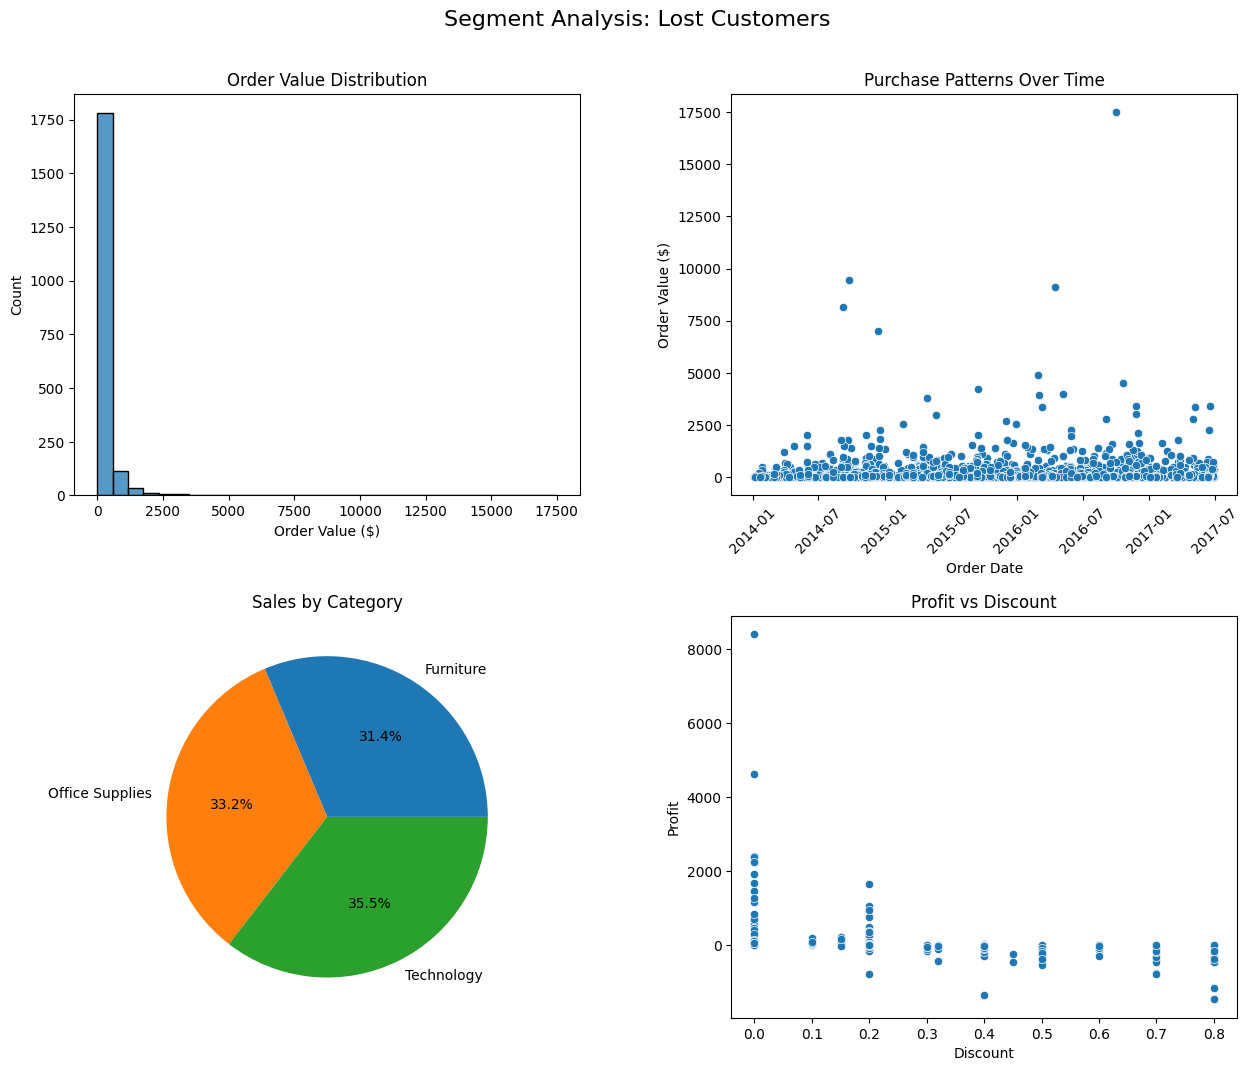


📈 SEGMENT CHARACTERISTICS
Average order frequency: 10.0 orders per customer
Average basket size: $215.05
Segment share of total revenue: 19.9%


🎯 SEGMENT: New Customers

📊 SIZE & VALUE
Number of Customers: 183
Percentage of Total: 23.1%
Total Revenue: $217,843.11
Total Profit: $23,817.11
Average Order Value: $256.29
Profit Margin: 10.9%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


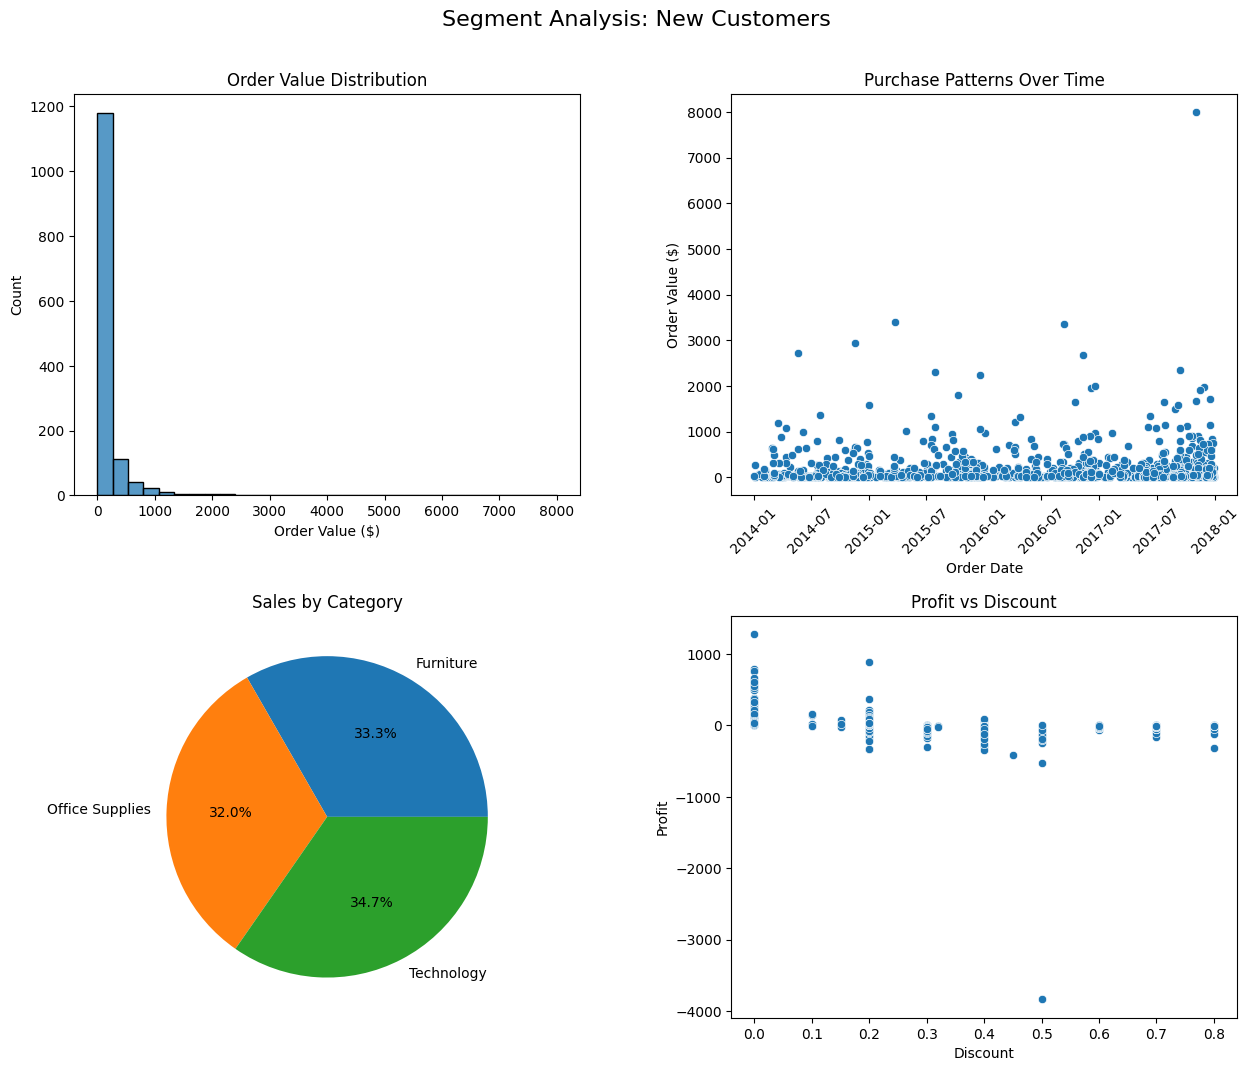


📈 SEGMENT CHARACTERISTICS
Average order frequency: 7.6 orders per customer
Average basket size: $159.73
Segment share of total revenue: 9.5%


🎯 SEGMENT: Loyal Customers

📊 SIZE & VALUE
Number of Customers: 149
Percentage of Total: 18.8%
Total Revenue: $636,936.33
Total Profit: $73,640.57
Average Order Value: $513.24
Profit Margin: 11.6%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


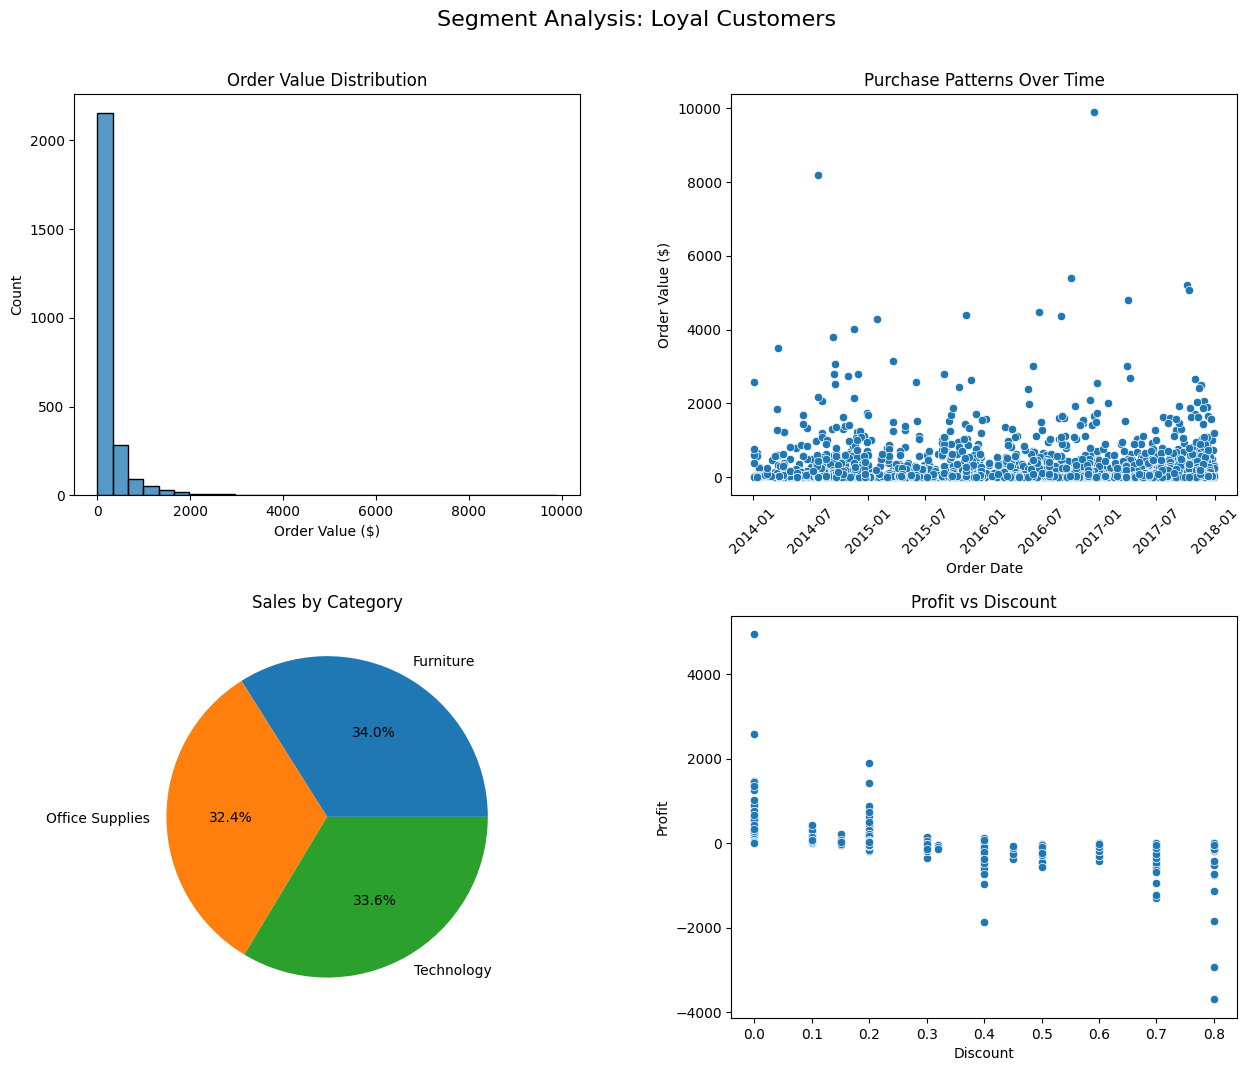


📈 SEGMENT CHARACTERISTICS
Average order frequency: 17.9 orders per customer
Average basket size: $243.63
Segment share of total revenue: 27.7%


🎯 SEGMENT: Active Customers

📊 SIZE & VALUE
Number of Customers: 112
Percentage of Total: 14.1%
Total Revenue: $311,784.22
Total Profit: $39,631.61
Average Order Value: $420.19
Profit Margin: 12.7%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


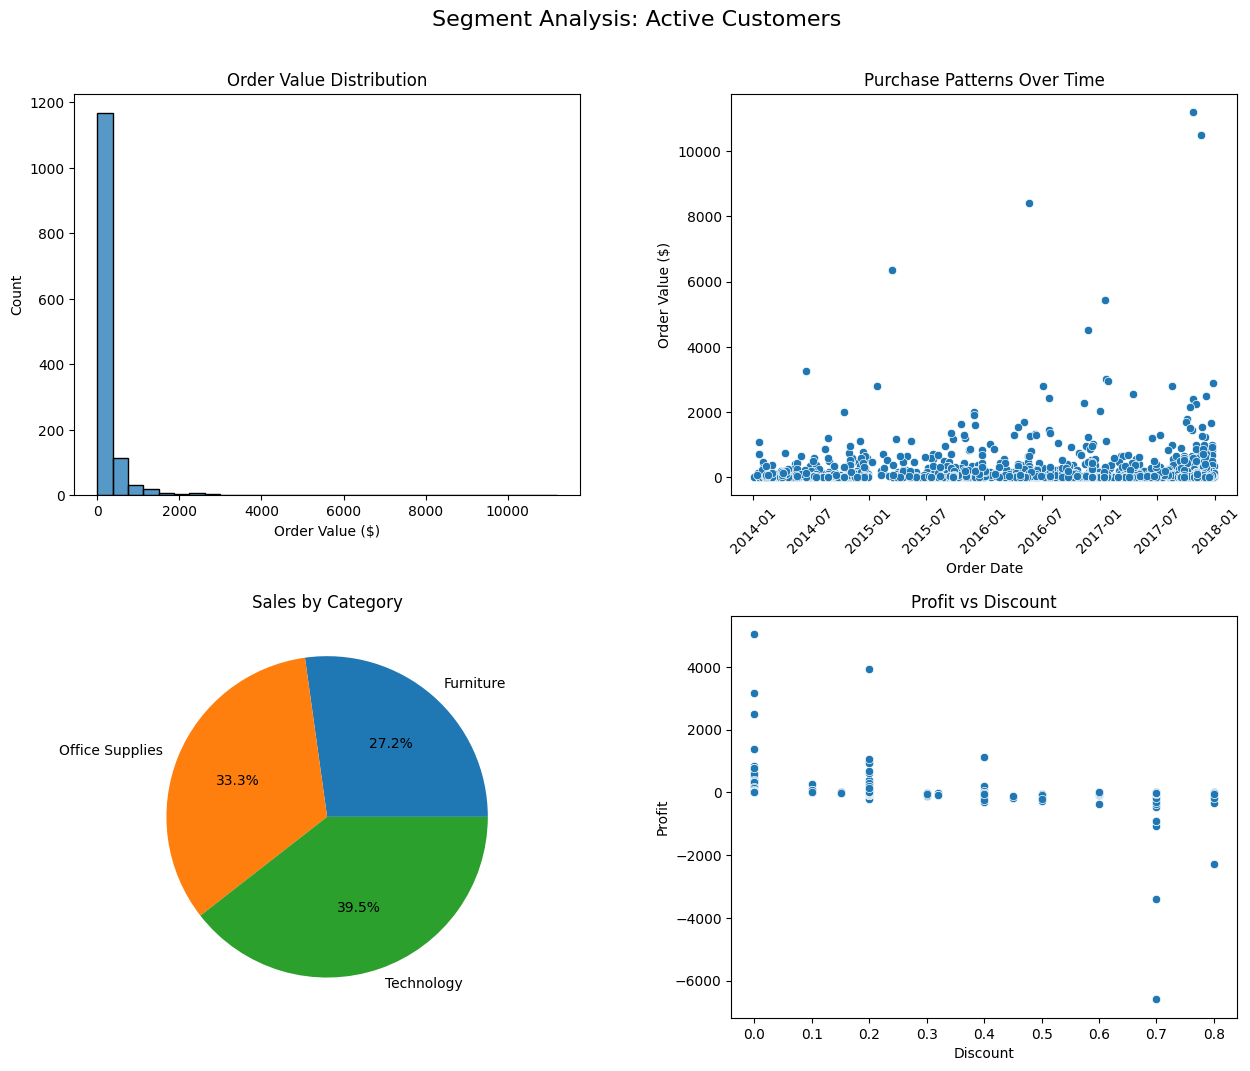


📈 SEGMENT CHARACTERISTICS
Average order frequency: 12.2 orders per customer
Average basket size: $217.20
Segment share of total revenue: 13.6%


🎯 SEGMENT: Regular Customers

📊 SIZE & VALUE
Number of Customers: 124
Percentage of Total: 15.6%
Total Revenue: $495,012.09
Total Profit: $56,252.35
Average Order Value: $531.70
Profit Margin: 11.4%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


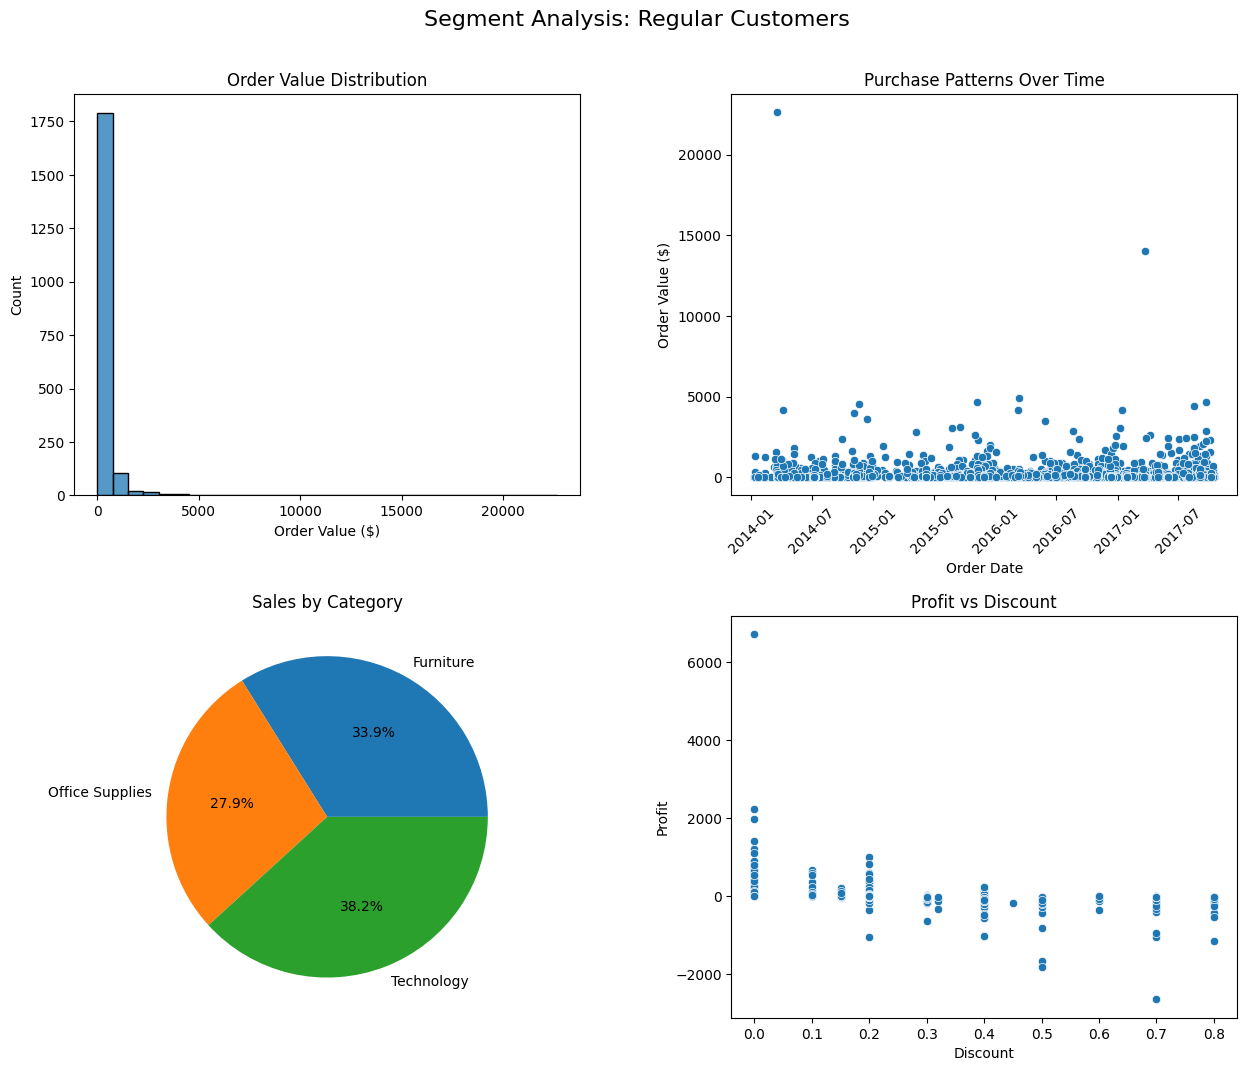


📈 SEGMENT CHARACTERISTICS
Average order frequency: 15.7 orders per customer
Average basket size: $240.04
Segment share of total revenue: 21.5%


🎯 SEGMENT: Best Customers

📊 SIZE & VALUE
Number of Customers: 29
Percentage of Total: 3.7%
Total Revenue: $178,765.74
Total Profit: $21,741.86
Average Order Value: $614.32
Profit Margin: 12.2%


<ipython-input-33-a5e1fb6ce2e2>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


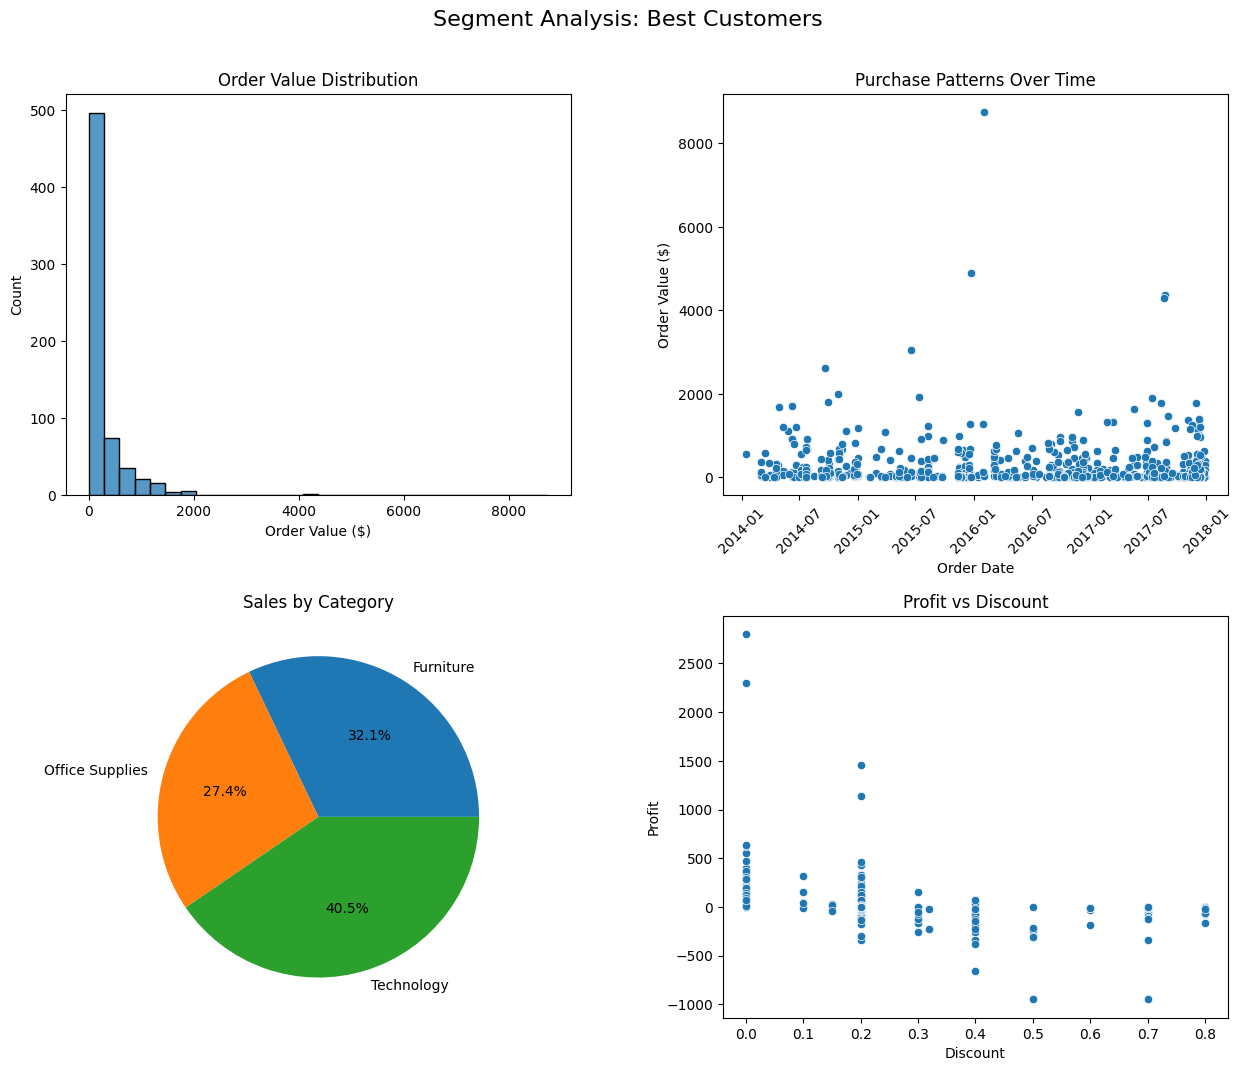


📈 SEGMENT CHARACTERISTICS
Average order frequency: 22.8 orders per customer
Average basket size: $270.18
Segment share of total revenue: 7.8%


In [33]:
def plot_segment_analysis(df_with_segments, segment):
    """
    Create visualizations for segment analysis
    """
    segment_data = df_with_segments[df_with_segments['Customer_Segment'] == segment]

    fig = plt.figure(figsize=(15, 12))

    # Create subplot grid
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

    # Add title
    fig.suptitle(f'Segment Analysis: {segment}', fontsize=16, y=0.95)

    # 1. Order Value Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=segment_data, x='Sales', bins=30, ax=ax1)
    ax1.set_title('Order Value Distribution')
    ax1.set_xlabel('Order Value ($)')
    ax1.set_ylabel('Count')

    # 2. Purchase Patterns Over Time
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=segment_data, x='Order Date', y='Sales', ax=ax2)
    ax2.set_title('Purchase Patterns Over Time')
    ax2.set_xlabel('Order Date')
    ax2.set_ylabel('Order Value ($)')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # 3. Category Distribution
    ax3 = fig.add_subplot(gs[1, 0])
    category_sales = segment_data.groupby('Category')['Sales'].sum()
    ax3.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
    ax3.set_title('Sales by Category')

    # 4. Profit vs Discount Relationship
    ax4 = fig.add_subplot(gs[1, 1])
    sns.scatterplot(data=segment_data, x='Discount', y='Profit', ax=ax4)
    ax4.set_title('Profit vs Discount')
    ax4.set_xlabel('Discount')
    ax4.set_ylabel('Profit')

    plt.tight_layout()
    return fig

def display_segment_analysis(df, rfm_df, profiles):
    """
    Display comprehensive segment analysis with visualizations
    """
    # Prepare data
    df_with_segments = prepare_data_for_visualization(df, rfm_df)

    # Calculate validation metrics
    if all(col in rfm_df.columns for col in ['R_Score', 'F_Score', 'M_Score']):
        features = rfm_df[['R_Score', 'F_Score', 'M_Score']].values
        labels = rfm_df['Customer_Segment'].astype('category').cat.codes

        print("\n🎯 SEGMENTATION VALIDATION METRICS")
        print("="*80)
        try:
            s_score = silhouette_score(features, labels)
            db_score = davies_bouldin_score(features, labels)
            ch_score = calinski_harabasz_score(features, labels)

            print(f"Silhouette Score: {s_score:.3f}")
            print(f"Davies-Bouldin Score: {db_score:.3f}")
            print(f"Calinski-Harabasz Score: {ch_score:.3f}")
            print("\nInterpretation:")
            print("- Silhouette Score: Range [-1, 1], higher is better")
            print("- Davies-Bouldin Score: Lower is better")
            print("- Calinski-Harabasz Score: Higher is better")
        except Exception as e:
            print(f"Could not calculate validation metrics: {str(e)}")

    # Display segment profiles and visualizations
    for segment, profile in profiles.items():
        print(f"\n{'='*80}")
        print(f"\n🎯 SEGMENT: {segment}")
        print(f"{'='*80}")

        # Display original metrics
        print("\n📊 SIZE & VALUE")
        print(f"Number of Customers: {profile['size']['customer_count']:,}")
        print(f"Percentage of Total: {profile['size']['customer_percentage']:.1f}%")
        print(f"Total Revenue: ${profile['value_metrics']['total_revenue']:,.2f}")
        print(f"Total Profit: ${profile['value_metrics']['total_profit']:,.2f}")
        print(f"Average Order Value: ${profile['value_metrics']['average_order_value']:,.2f}")
        print(f"Profit Margin: {profile['value_metrics']['profit_margin']:.1f}%")

        # Generate and display visualizations
        try:
            fig = plot_segment_analysis(df_with_segments, segment)
            plt.show()
        except Exception as e:
            print(f"\nCould not generate visualizations: {str(e)}")

        # Add segment-specific metrics
        segment_data = df_with_segments[df_with_segments['Customer_Segment'] == segment]
        avg_basket_size = segment_data.groupby('Order ID')['Sales'].mean()
        total_revenue = df_with_segments['Sales'].sum()
        segment_revenue = segment_data['Sales'].sum()

        print("\n📈 SEGMENT CHARACTERISTICS")
        print(f"Average order frequency: {len(segment_data)/len(segment_data['Customer ID'].unique()):.1f} orders per customer")
        print(f"Average basket size: ${float(avg_basket_size.mean()):.2f}")
        print(f"Segment share of total revenue: {(segment_revenue/total_revenue):.1%}")

# Execute the analysis
df_with_segments = prepare_data_for_visualization(df, rfm_df)
display_segment_analysis(df, rfm_df, profiles)

## A Focus on Lost Customers
Based on recency score--haven't made a purchase in a long time compared to other customers

In [34]:
def analyze_lost_customers(df, rfm_df):
    """
    Detailed analysis of lost customer patterns
    """
    # Get lost customers
    lost_customers = rfm_df[rfm_df['Customer_Segment'] == 'Lost Customers']['Customer ID']
    lost_data = df[df['Customer ID'].isin(lost_customers)].copy()

    # Convert dates if needed
    lost_data['Order Date'] = pd.to_datetime(lost_data['Order Date'])

    # Last purchase analysis
    last_purchases = lost_data.groupby('Customer ID')['Order Date'].max()
    time_since_last = pd.Timestamp.now() - last_purchases

    # Purchase pattern analysis
    customer_purchase_patterns = lost_data.groupby('Customer ID').agg({
        'Order Date': ['count', 'min', 'max'],
        'Sales': ['sum', 'mean'],
        'Profit': ['sum', 'mean'],
        'Discount': 'mean'
    })

    # Calculate activity period and purchase frequency
    customer_purchase_patterns['active_period_days'] = (
        customer_purchase_patterns['Order Date']['max'] -
        customer_purchase_patterns['Order Date']['min']
    ).dt.days

    customer_purchase_patterns['purchase_frequency_days'] = (
        customer_purchase_patterns['active_period_days'] /
        customer_purchase_patterns['Order Date']['count']
    )

    return {
        'time_since_purchase_stats': {
            'mean_days': time_since_last.dt.days.mean(),
            'median_days': time_since_last.dt.days.median(),
            'min_days': time_since_last.dt.days.min(),
            'max_days': time_since_last.dt.days.max()
        },
        'activity_stats': {
            'avg_active_period': customer_purchase_patterns['active_period_days'].mean(),
            'avg_purchase_frequency': customer_purchase_patterns['purchase_frequency_days'].mean(),
            'avg_total_spend': customer_purchase_patterns['Sales']['sum'].mean(),
            'avg_profit_per_customer': customer_purchase_patterns['Profit']['sum'].mean()
        },
        'purchase_patterns': customer_purchase_patterns
    }

# Run the analysis
lost_analysis = analyze_lost_customers(df, rfm_df)

# Display results
print("\n🔍 LOST CUSTOMER ANALYSIS")
print("="*80)
print("\nTime Since Last Purchase:")
for metric, value in lost_analysis['time_since_purchase_stats'].items():
    print(f"{metric.replace('_', ' ').title()}: {value:.1f} days")

print("\nActivity Patterns:")
for metric, value in lost_analysis['activity_stats'].items():
    if 'spend' in metric or 'profit' in metric:
        print(f"{metric.replace('_', ' ').title()}: ${value:.2f}")
    else:
        print(f"{metric.replace('_', ' ').title()}: {value:.1f} days")


🔍 LOST CUSTOMER ANALYSIS

Time Since Last Purchase:
Mean Days: 2900.2 days
Median Days: 2860.0 days
Min Days: 2675.0 days
Max Days: 3656.0 days

Activity Patterns:
Avg Active Period: 755.7 days
Avg Purchase Frequency: 89.6 days
Avg Total Spend: $2330.92
Avg Profit Per Customer: $363.84




🎯 SEGMENT: Lost Customers


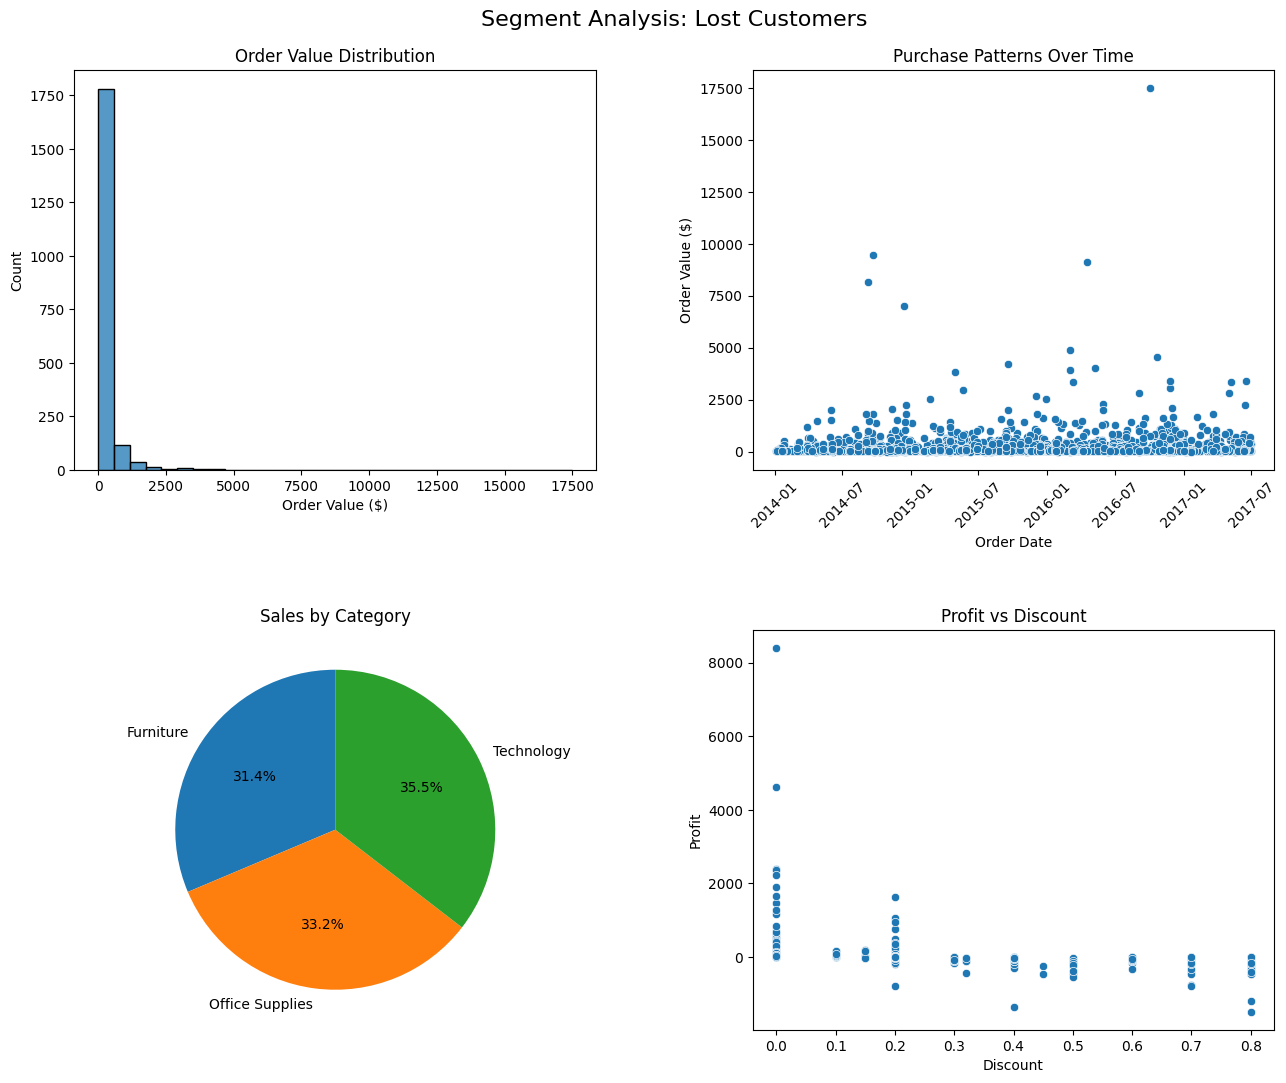



🎯 SEGMENT: New Customers


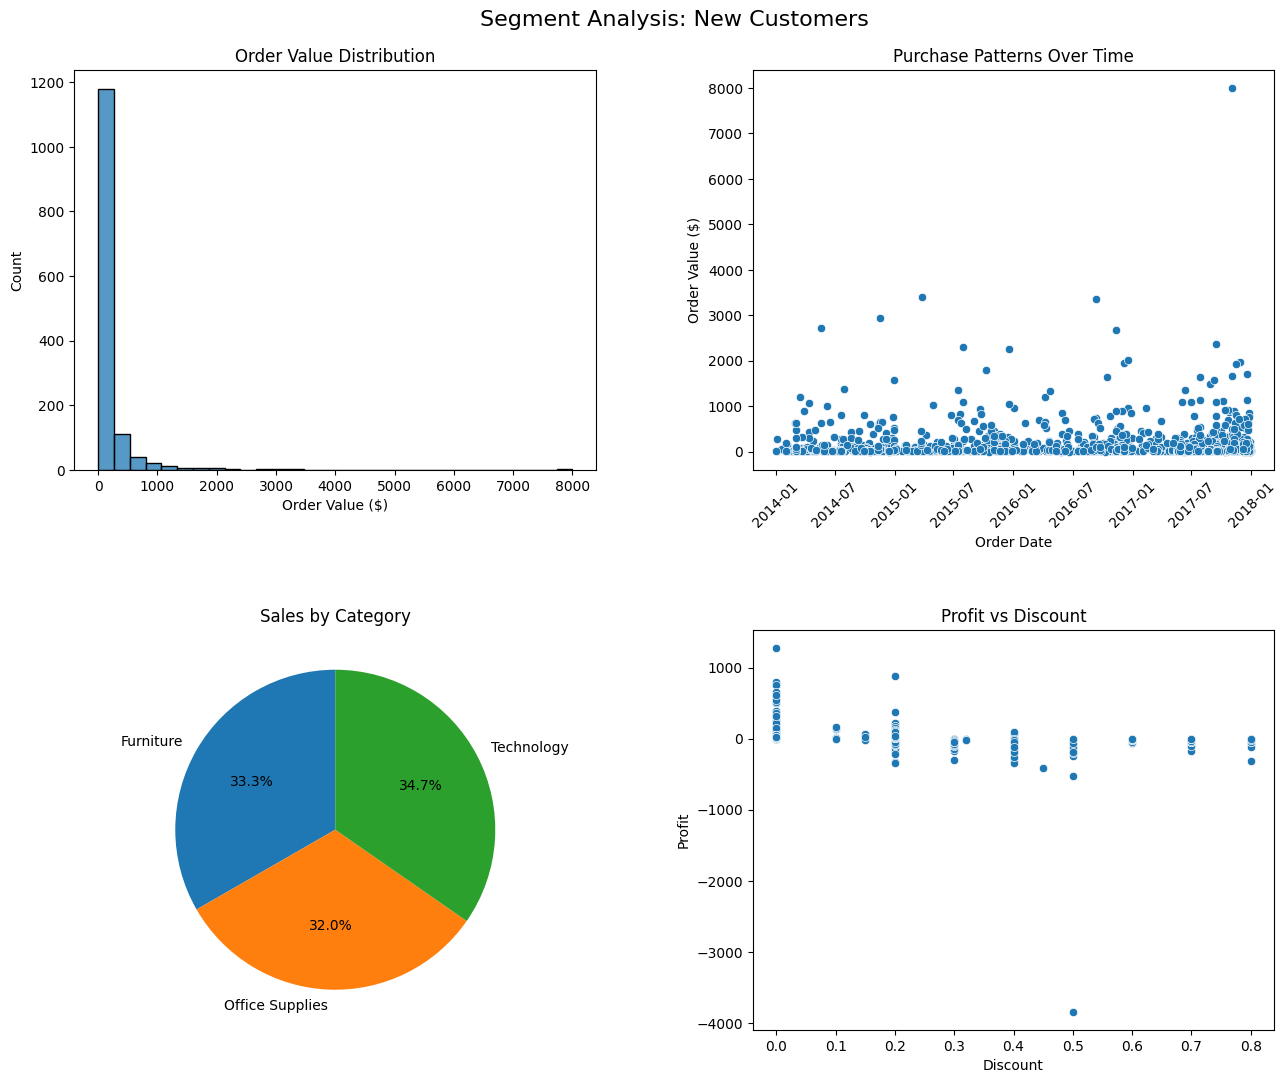



🎯 SEGMENT: Loyal Customers


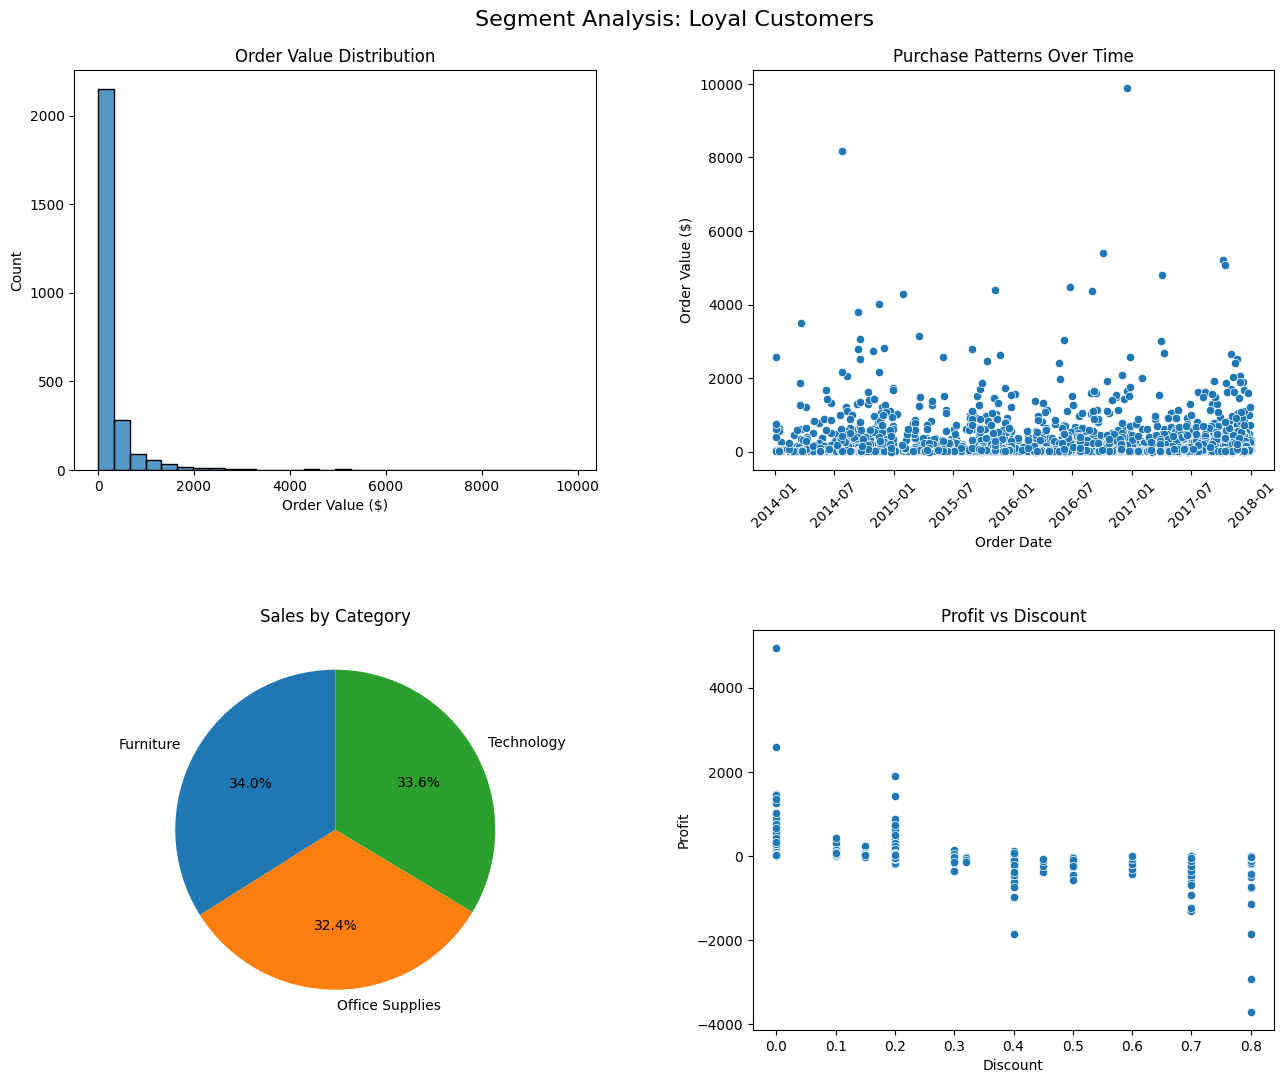



🎯 SEGMENT: Active Customers


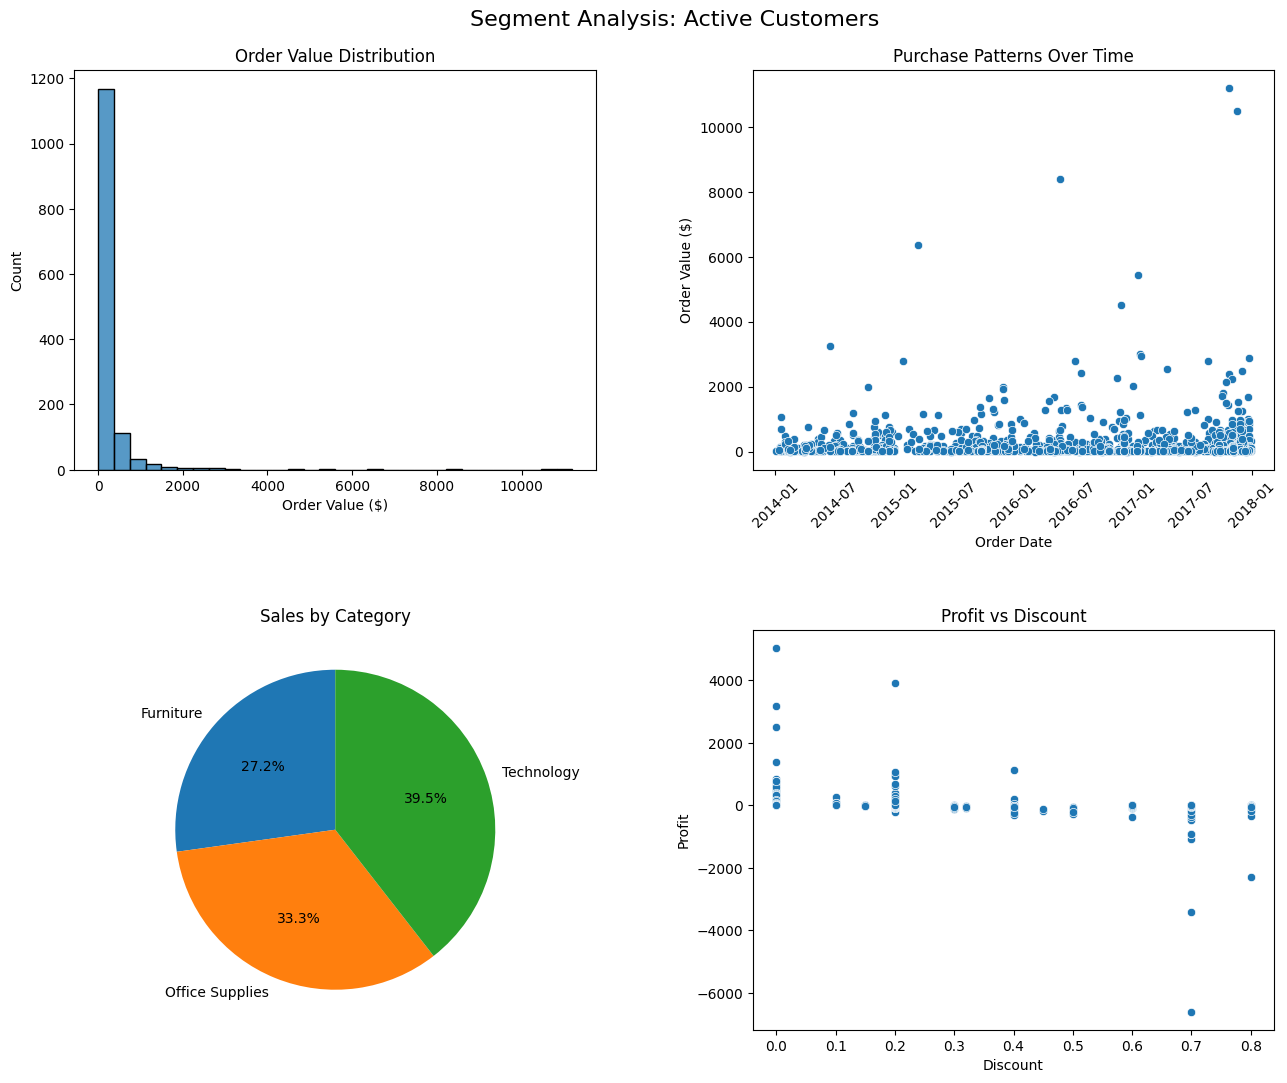



🎯 SEGMENT: Regular Customers


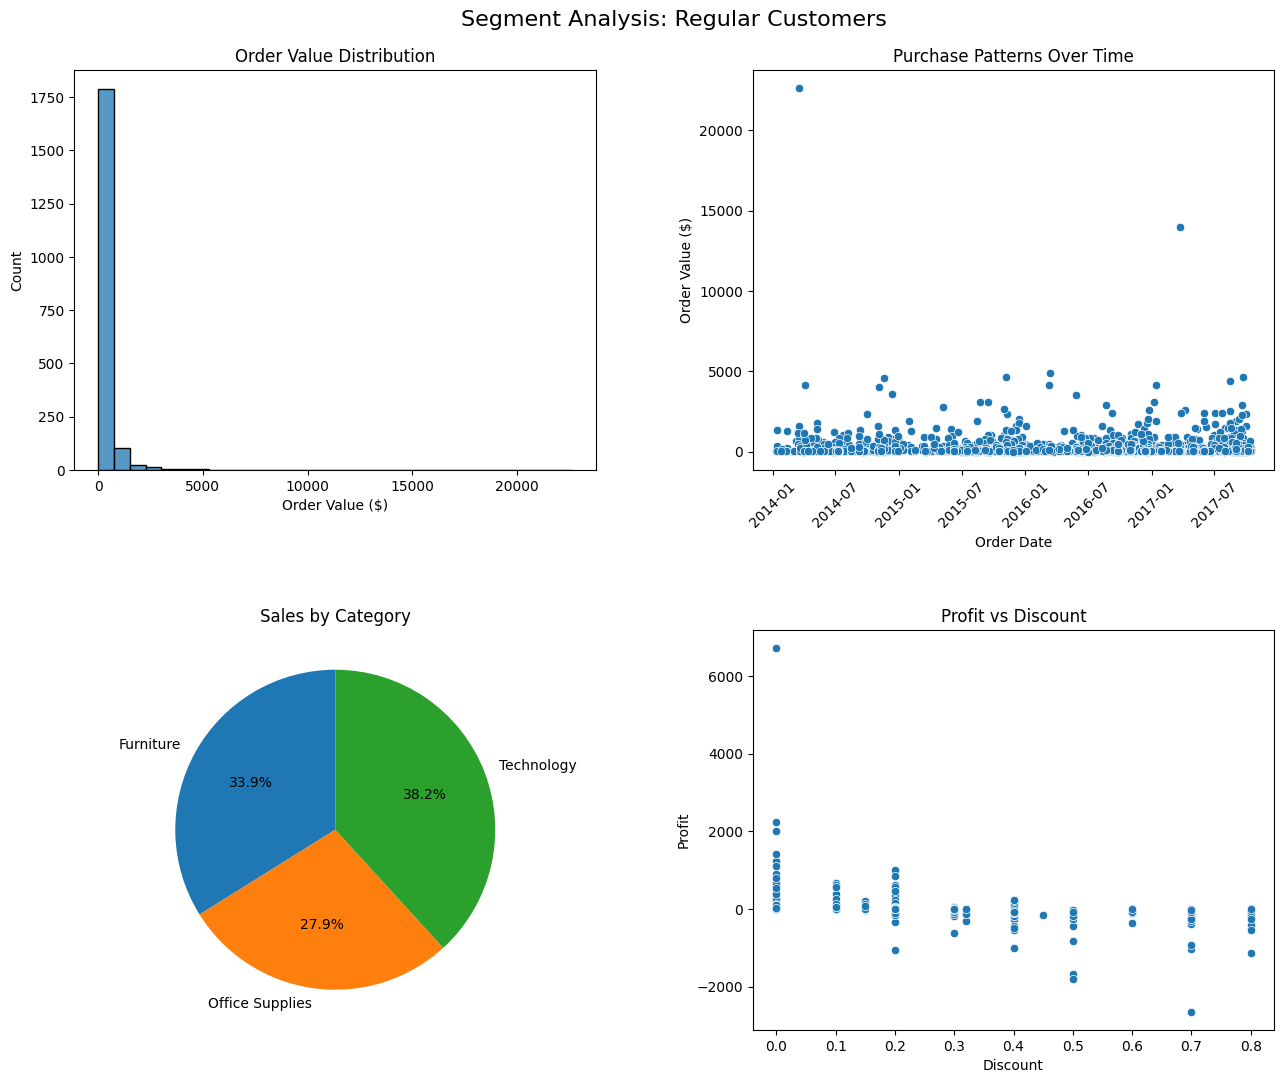



🎯 SEGMENT: Best Customers


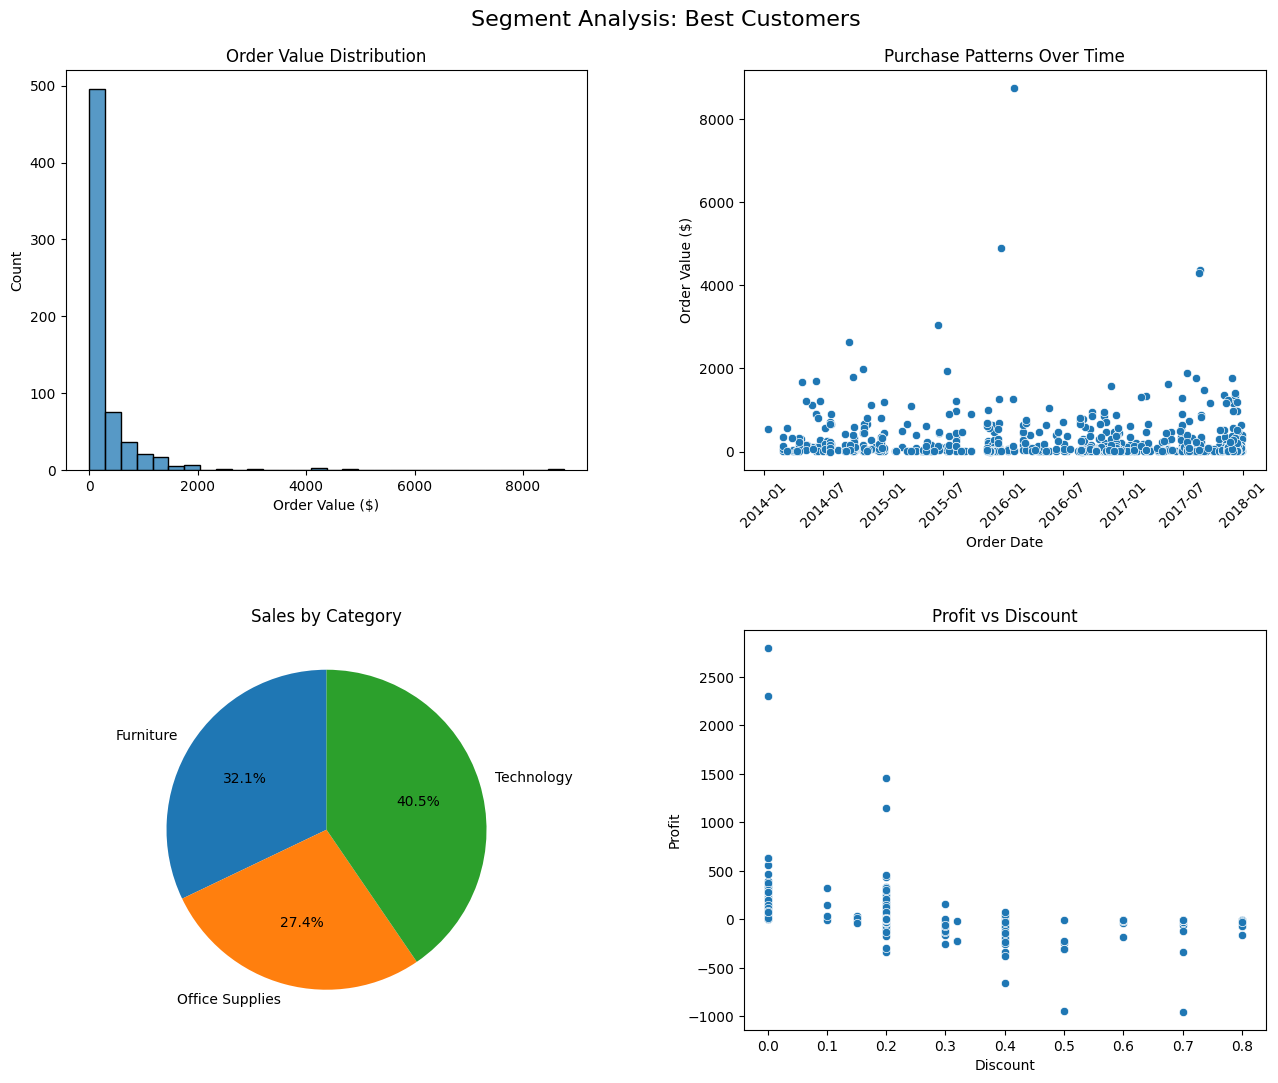

In [35]:
def plot_segment_analysis(df_with_segments, segment):
    """
    Create visualizations for segment analysis without tight_layout warnings
    """
    segment_data = df_with_segments[df_with_segments['Customer_Segment'] == segment]

    # Create figure with more precise spacing
    fig = plt.figure(figsize=(15, 12))

    # Add GridSpec with specific spacing
    gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

    # Add title with specific positioning
    fig.suptitle(f'Segment Analysis: {segment}', fontsize=16, y=0.95)

    # 1. Order Value Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=segment_data, x='Sales', bins=30, ax=ax1)
    ax1.set_title('Order Value Distribution')
    ax1.set_xlabel('Order Value ($)')
    ax1.set_ylabel('Count')

    # 2. Purchase Patterns Over Time
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=segment_data, x='Order Date', y='Sales', ax=ax2)
    ax2.set_title('Purchase Patterns Over Time')
    ax2.set_xlabel('Order Date')
    ax2.set_ylabel('Order Value ($)')
    ax2.tick_params(axis='x', rotation=45)

    # 3. Category Distribution
    ax3 = fig.add_subplot(gs[1, 0])
    category_sales = segment_data.groupby('Category')['Sales'].sum()
    total_sales = category_sales.sum()
    category_percentages = (category_sales / total_sales * 100).round(1)
    ax3.pie(category_sales, labels=category_sales.index,
            autopct=lambda pct: f'{pct:.1f}%',
            startangle=90)
    ax3.set_title('Sales by Category')

    # 4. Profit vs Discount Relationship
    ax4 = fig.add_subplot(gs[1, 1])
    sns.scatterplot(data=segment_data, x='Discount', y='Profit', ax=ax4)
    ax4.set_title('Profit vs Discount')
    ax4.set_xlabel('Discount')
    ax4.set_ylabel('Profit')

    # Adjust layout without using tight_layout
    fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

    return fig

def display_segment_analysis(df, rfm_df, profiles):
    """
    Display segment analysis with improved visualization handling
    """
    # Rest of the code remains the same until the visualization part

    for segment, profile in profiles.items():
        print(f"\n{'='*80}")
        print(f"\n🎯 SEGMENT: {segment}")
        print(f"{'='*80}")

        # Display metrics...

        # Generate and display visualizations with proper cleanup
        try:
            fig = plot_segment_analysis(df_with_segments, segment)
            plt.show()
            plt.close(fig)  # Explicitly close the figure
        except Exception as e:
            print(f"\nCould not generate visualizations: {str(e)}")

        # Continue with segment characteristics...

# Execute the analysis
df_with_segments = prepare_data_for_visualization(df, rfm_df)
display_segment_analysis(df, rfm_df, profiles)


1. RECALIBRATED RFM ANALYSIS

Updated Segment Distribution:
Customer_Segment
Regular       247
Loyal         188
Recent        180
Frequent      146
Champion       29
Historical      3
Name: count, dtype: int64

2. LIFECYCLE ANALYSIS

Lifecycle Metrics Summary:
                      First_Purchase                  Last_Purchase  \
count                            793                            793   
mean   2014-11-09 13:08:05.750315264  2017-08-05 04:45:05.674653184   
min              2014-01-03 00:00:00            2014-10-22 00:00:00   
25%              2014-05-11 00:00:00            2017-06-30 00:00:00   
50%              2014-09-12 00:00:00            2017-10-16 00:00:00   
75%              2014-12-31 00:00:00            2017-11-30 00:00:00   
max              2017-11-05 00:00:00            2017-12-30 00:00:00   
std                              NaN                            NaN   

       Purchase_Count   Total_Sales  Avg_Order_Value  Total_Profit  \
count      793.000000    79

<ipython-input-36-cca751c77417>:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


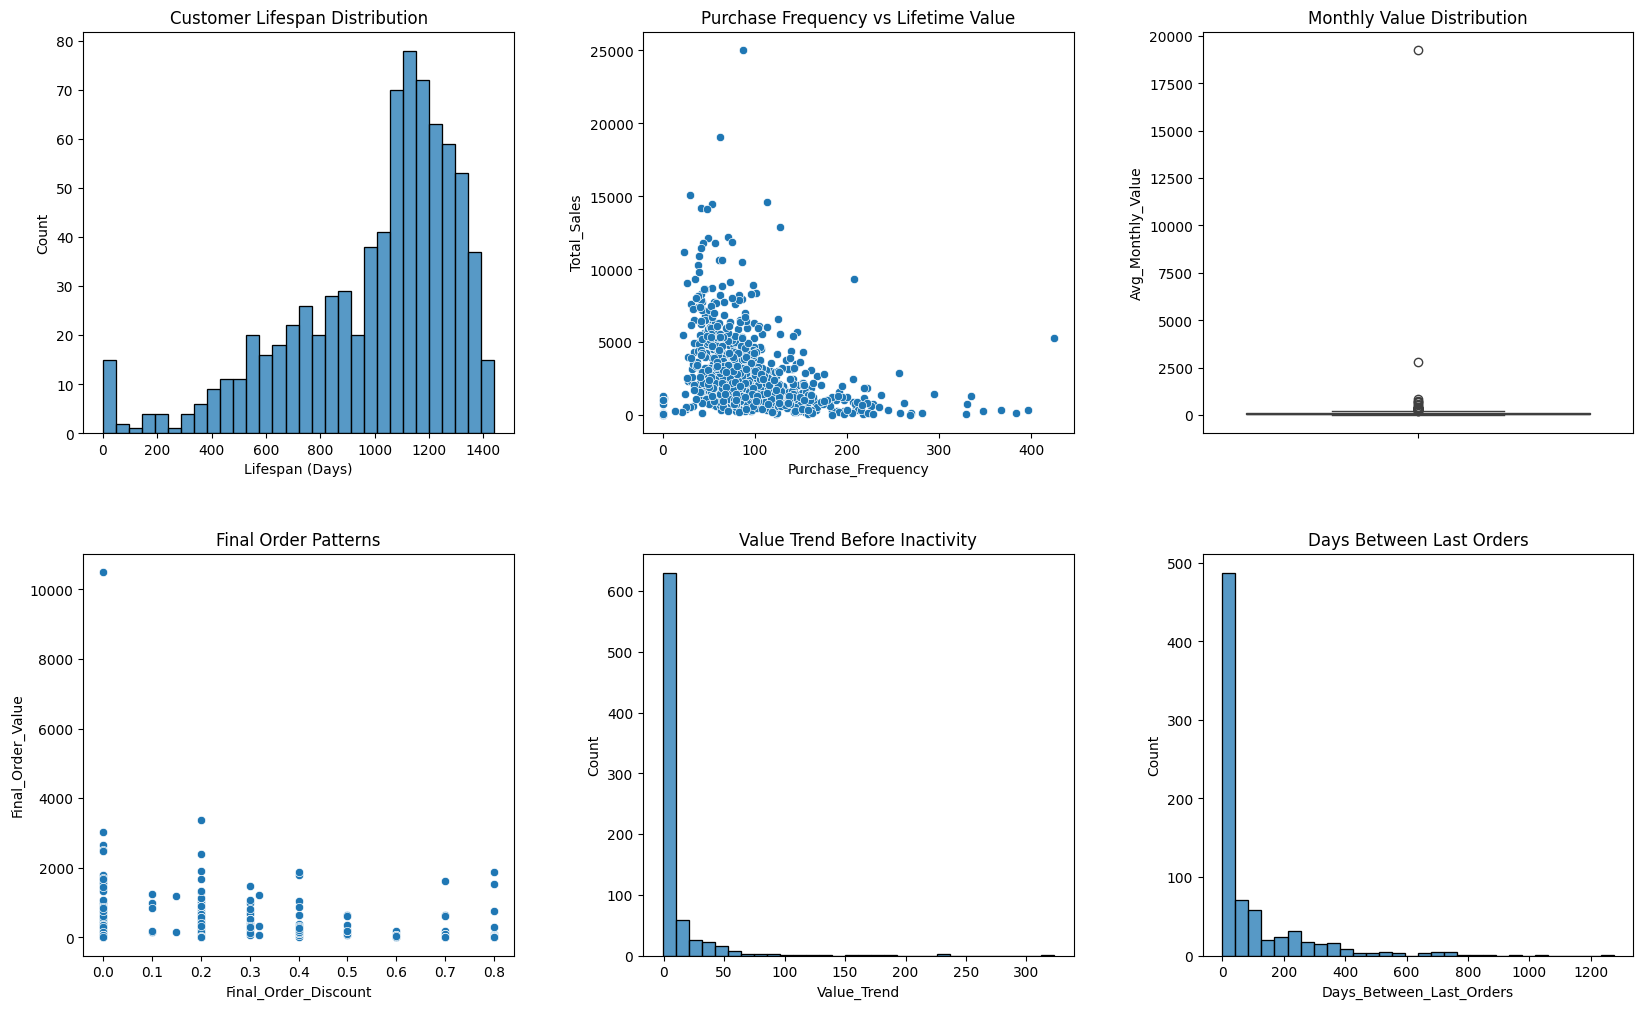

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def recalibrate_rfm_scores(df, reference_date=None, max_recency_years=3):
    """
    Recalibrate RFM scores with appropriate timeframes

    Parameters:
    -----------
    df : DataFrame
        Original dataframe with transaction data
    reference_date : datetime
        Point in time for analysis (defaults to max date in dataset)
    max_recency_years : int
        Maximum years to consider for recency scoring
    """
    # Ensure dates are datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])

    # Set reference date
    if reference_date is None:
        reference_date = df['Order Date'].max()

    # Calculate RFM metrics
    rfm_data = df.groupby('Customer ID').agg({
        'Order Date': lambda x: (reference_date - x.max()).days,  # Recency
        'Order ID': 'count',  # Frequency
        'Sales': 'sum'   # Monetary
    }).reset_index()

    # Rename columns
    rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

    # Create scores using quartiles, but adjust recency for historical data
    rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'].clip(upper=max_recency_years*365),
                                 q=4, labels=[4, 3, 2, 1])
    rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'],
                                 q=4, labels=[1, 2, 3, 4])
    rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'],
                                 q=4, labels=[1, 2, 3, 4])

    # Calculate segment based on adjusted scores
    def get_segment(row):
        if row['Recency'] > max_recency_years*365:
            return 'Historical'
        elif row['R_Score'] == 4 and row['F_Score'] == 4 and row['M_Score'] == 4:
            return 'Champion'
        elif (row['R_Score'] >= 3) and (row['F_Score'] >= 3):
            return 'Loyal'
        elif (row['R_Score'] >= 3):
            return 'Recent'
        elif (row['F_Score'] >= 3):
            return 'Frequent'
        else:
            return 'Regular'

    rfm_data['Customer_Segment'] = rfm_data.apply(get_segment, axis=1)

    return rfm_data

def analyze_customer_lifecycle(df):
    """
    Analyze customer lifecycle patterns
    """
    # Convert dates
    df['Order Date'] = pd.to_datetime(df['Order Date'])

    # Calculate customer metrics
    customer_metrics = df.groupby('Customer ID').agg({
        'Order Date': ['min', 'max', 'count'],
        'Sales': ['sum', 'mean'],
        'Profit': ['sum', 'mean'],
        'Discount': 'mean'
    }).reset_index()

    # Flatten column names
    customer_metrics.columns = ['Customer ID', 'First_Purchase', 'Last_Purchase',
                              'Purchase_Count', 'Total_Sales', 'Avg_Order_Value',
                              'Total_Profit', 'Avg_Profit', 'Avg_Discount']

    # Calculate lifecycle metrics
    customer_metrics['Lifespan_Days'] = (customer_metrics['Last_Purchase'] -
                                       customer_metrics['First_Purchase']).dt.days
    customer_metrics['Purchase_Frequency'] = customer_metrics['Lifespan_Days'] / customer_metrics['Purchase_Count']
    customer_metrics['Avg_Monthly_Value'] = customer_metrics['Total_Sales'] / (customer_metrics['Lifespan_Days'] / 30)

    return customer_metrics

def investigate_inactivity_patterns(df, customer_metrics):
    """
    Analyze patterns leading to customer inactivity
    """
    # Identify last purchase sequences
    last_sequences = []

    for customer in df['Customer ID'].unique():
        customer_orders = df[df['Customer ID'] == customer].sort_values('Order Date')

        if len(customer_orders) >= 3:  # Look at customers with at least 3 orders
            last_three = customer_orders.tail(3)

            sequence = {
                'Customer ID': customer,
                'Final_Order_Value': last_three.iloc[-1]['Sales'],
                'Final_Order_Profit': last_three.iloc[-1]['Profit'],
                'Final_Order_Discount': last_three.iloc[-1]['Discount'],
                'Days_Between_Last_Orders': (last_three.iloc[-1]['Order Date'] -
                                          last_three.iloc[-2]['Order Date']).days,
                'Value_Trend': last_three['Sales'].pct_change().mean(),
                'Discount_Trend': last_three['Discount'].diff().mean(),
                'Category_Changes': len(last_three['Category'].unique()),
            }

            last_sequences.append(sequence)

    return pd.DataFrame(last_sequences)

def visualize_lifecycle_patterns(customer_metrics, inactivity_patterns):
    """
    Create visualizations for lifecycle and inactivity patterns
    """
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

    # 1. Customer Lifespan Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=customer_metrics, x='Lifespan_Days', bins=30, ax=ax1)
    ax1.set_title('Customer Lifespan Distribution')
    ax1.set_xlabel('Lifespan (Days)')

    # 2. Purchase Frequency vs Lifetime Value
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=customer_metrics, x='Purchase_Frequency', y='Total_Sales', ax=ax2)
    ax2.set_title('Purchase Frequency vs Lifetime Value')

    # 3. Monthly Value Distribution
    ax3 = fig.add_subplot(gs[0, 2])
    sns.boxplot(data=customer_metrics, y='Avg_Monthly_Value', ax=ax3)
    ax3.set_title('Monthly Value Distribution')

    # 4. Final Order Patterns
    ax4 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=inactivity_patterns, x='Final_Order_Discount', y='Final_Order_Value', ax=ax4)
    ax4.set_title('Final Order Patterns')

    # 5. Value Trend Before Inactivity
    ax5 = fig.add_subplot(gs[1, 1])
    sns.histplot(data=inactivity_patterns, x='Value_Trend', bins=30, ax=ax5)
    ax5.set_title('Value Trend Before Inactivity')

    # 6. Days Between Last Orders
    ax6 = fig.add_subplot(gs[1, 2])
    sns.histplot(data=inactivity_patterns, x='Days_Between_Last_Orders', bins=30, ax=ax6)
    ax6.set_title('Days Between Last Orders')

    plt.tight_layout()
    return fig

# Execute analysis
def run_complete_analysis(df):
    """
    Run complete customer analysis suite
    """
    print("\n1. RECALIBRATED RFM ANALYSIS")
    print("=" * 80)
    rfm_new = recalibrate_rfm_scores(df)
    print("\nUpdated Segment Distribution:")
    print(rfm_new['Customer_Segment'].value_counts())

    print("\n2. LIFECYCLE ANALYSIS")
    print("=" * 80)
    lifecycle_metrics = analyze_customer_lifecycle(df)
    print("\nLifecycle Metrics Summary:")
    print(lifecycle_metrics.describe())

    print("\n3. INACTIVITY PATTERNS")
    print("=" * 80)
    inactivity_data = investigate_inactivity_patterns(df, lifecycle_metrics)
    print("\nInactivity Pattern Summary:")
    print(inactivity_data.describe())

    # Create visualizations
    fig = visualize_lifecycle_patterns(lifecycle_metrics, inactivity_data)
    plt.show()

    return {
        'rfm': rfm_new,
        'lifecycle': lifecycle_metrics,
        'inactivity': inactivity_data
    }

# Run the analysis
results = run_complete_analysis(df)

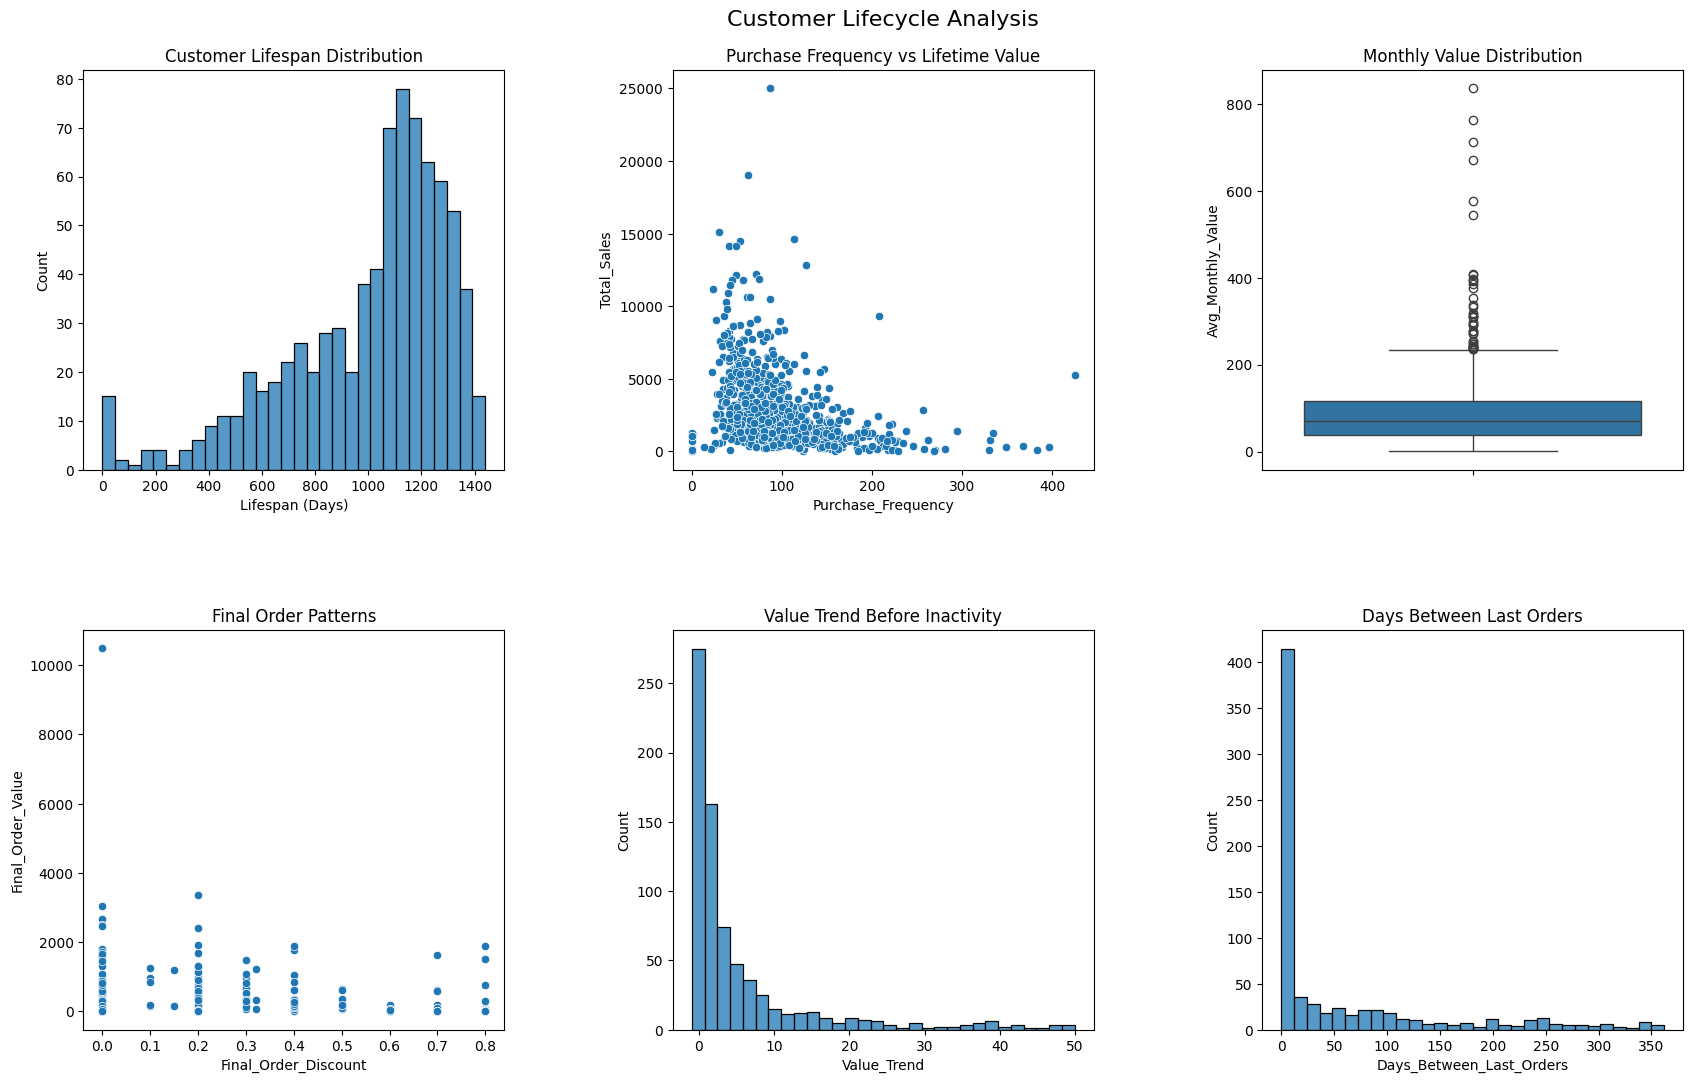

In [37]:
def visualize_lifecycle_patterns_fixed(customer_metrics, inactivity_patterns):
    """
    Create visualizations for lifecycle and inactivity patterns without tight_layout warnings
    """
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.4)

    # Add overall title with proper spacing
    fig.suptitle('Customer Lifecycle Analysis', fontsize=16, y=0.95)

    # 1. Customer Lifespan Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=customer_metrics, x='Lifespan_Days', bins=30, ax=ax1)
    ax1.set_title('Customer Lifespan Distribution')
    ax1.set_xlabel('Lifespan (Days)')

    # 2. Purchase Frequency vs Lifetime Value
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=customer_metrics,
                   x='Purchase_Frequency',
                   y='Total_Sales',
                   ax=ax2)
    ax2.set_title('Purchase Frequency vs Lifetime Value')

    # 3. Monthly Value Distribution
    ax3 = fig.add_subplot(gs[0, 2])
    sns.boxplot(data=customer_metrics[customer_metrics['Avg_Monthly_Value'] < 1000],
                y='Avg_Monthly_Value',
                ax=ax3)
    ax3.set_title('Monthly Value Distribution')

    # 4. Final Order Patterns
    ax4 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=inactivity_patterns,
                   x='Final_Order_Discount',
                   y='Final_Order_Value',
                   ax=ax4)
    ax4.set_title('Final Order Patterns')

    # 5. Value Trend Before Inactivity
    ax5 = fig.add_subplot(gs[1, 1])
    sns.histplot(data=inactivity_patterns[inactivity_patterns['Value_Trend'] < 50],
                x='Value_Trend',
                bins=30,
                ax=ax5)
    ax5.set_title('Value Trend Before Inactivity')

    # 6. Days Between Last Orders
    ax6 = fig.add_subplot(gs[1, 2])
    sns.histplot(data=inactivity_patterns[inactivity_patterns['Days_Between_Last_Orders'] < 365],
                x='Days_Between_Last_Orders',
                bins=30,
                ax=ax6)
    ax6.set_title('Days Between Last Orders')

    # Use subplots_adjust instead of tight_layout
    fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.3)

    return fig

# Re-run with fixed visualization
fig = visualize_lifecycle_patterns_fixed(results['lifecycle'], results['inactivity'])
plt.show()

## Behavioral segmentation creation and analysis


BEHAVIORAL SEGMENT ANALYSIS

Segment Metrics:
                       Customer ID_count  Percent_of_Customers  \
Segment                                                          
New                                   22                   2.8   
Occasional High-Value                128                  16.1   
Occasional Regular                   281                  35.4   
Steady High-Value                    145                  18.3   
Steady Regular                       217                  27.4   

                       Revenue_Contribution  Purchase_Count_mean  \
Segment                                                            
New                                     0.5                  3.4   
Occasional High-Value                  20.9                  9.1   
Occasional Regular                     13.5                  8.0   
Steady High-Value                      40.4                 18.0   
Steady Regular                         24.7                 18.0   

             

<ipython-input-40-8bdd2dbb8b12>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(segment_counts.index, rotation=45, ha='right')
<ipython-input-40-8bdd2dbb8b12>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-8bdd2dbb8b12>:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


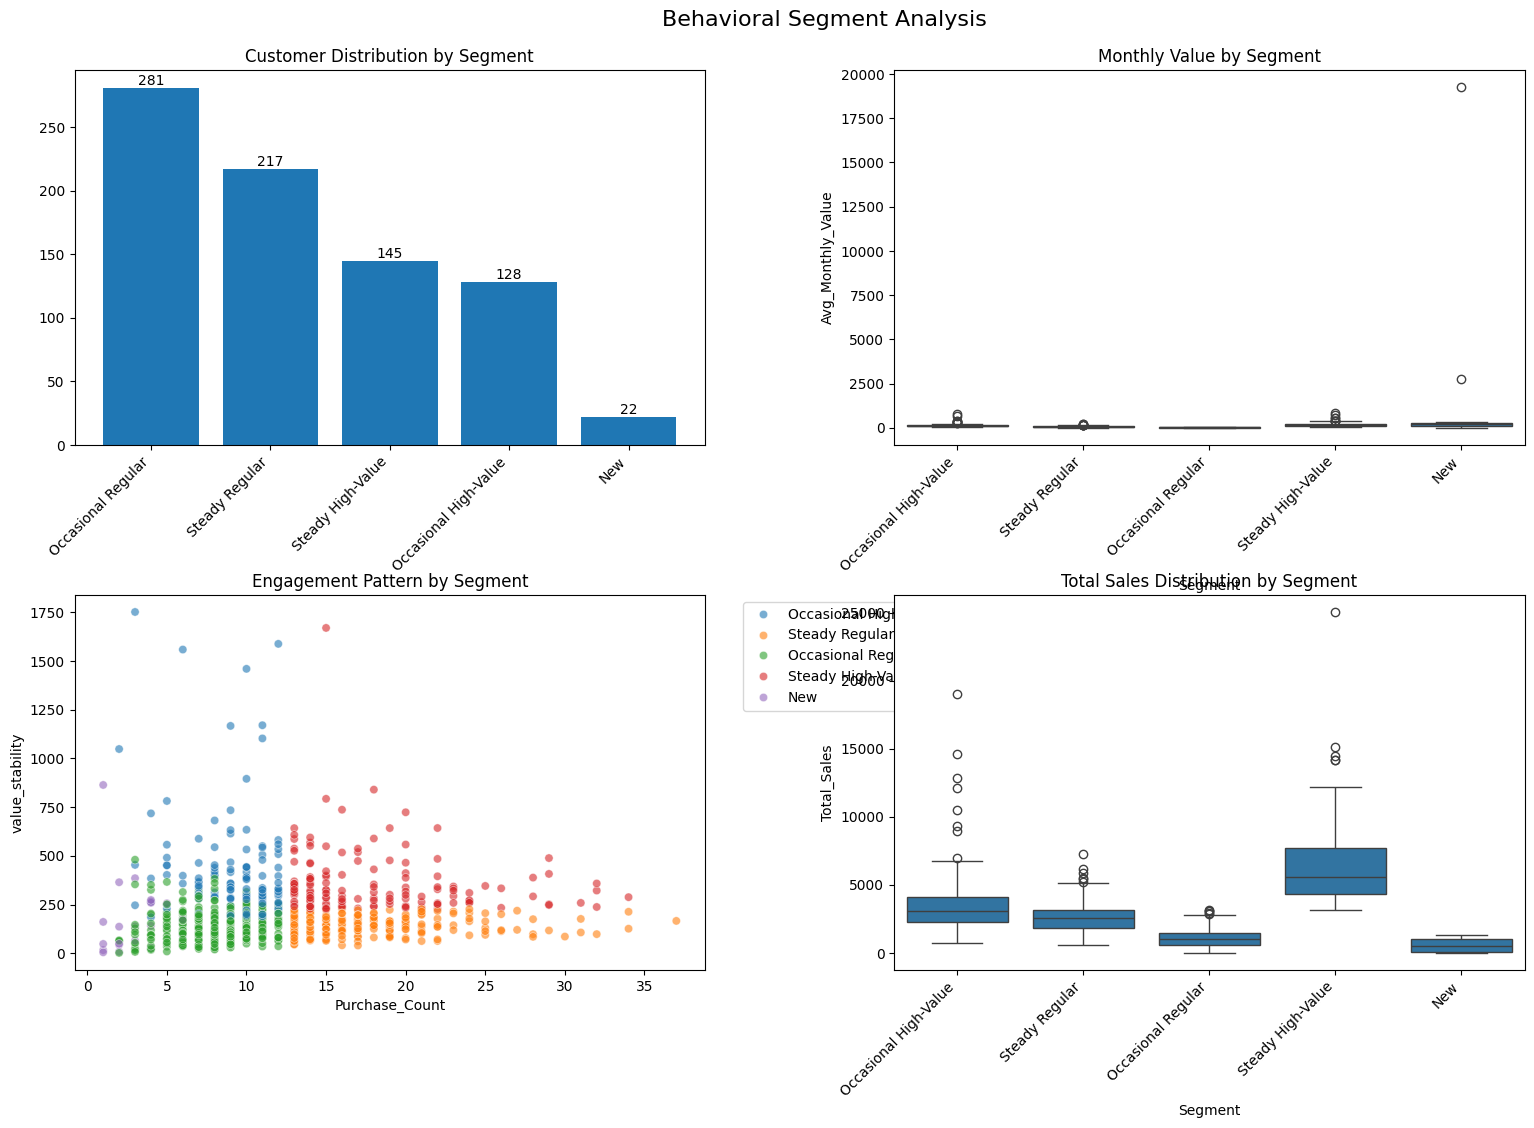

In [45]:
def create_behavioral_segments(df, customer_metrics):
    """
    Create segments based on behavioral patterns with proper customer ID handling
    """
    # Calculate key behavioral metrics
    behavioral_metrics = customer_metrics.copy()
    behavioral_metrics = behavioral_metrics.reset_index()  # This brings Customer ID back as a column

    # Handle infinite values in Avg_Monthly_Value
    behavioral_metrics['Avg_Monthly_Value'] = behavioral_metrics['Avg_Monthly_Value'].replace([np.inf, -np.inf], np.nan)
    behavioral_metrics['Avg_Monthly_Value'] = behavioral_metrics['Avg_Monthly_Value'].fillna(
        behavioral_metrics['Total_Sales'] / (behavioral_metrics['Lifespan_Days'] / 30)
    )

    # Value stability
    behavioral_metrics['value_stability'] = behavioral_metrics['Total_Sales'] / behavioral_metrics['Purchase_Count']

    # Engagement score
    behavioral_metrics['engagement_score'] = (
        (behavioral_metrics['Purchase_Count'] / behavioral_metrics['Lifespan_Days']) *
        (behavioral_metrics['Avg_Order_Value'] / behavioral_metrics['Avg_Order_Value'].mean())
    )

    # Calculate medians for comparison
    monthly_value_median = behavioral_metrics['Avg_Monthly_Value'].median()
    value_stability_mean = behavioral_metrics['value_stability'].mean()

    # Create segments
    def assign_segment(row):
        if pd.isna(row['Lifespan_Days']) or row['Lifespan_Days'] < 180:
            return 'New'
        elif row['engagement_score'] > 2:
            if row['value_stability'] > value_stability_mean:
                return 'High-Value Engaged'
            else:
                return 'Frequent Buyer'
        elif row['Purchase_Count'] > 12:  # More than monthly
            if row['value_stability'] > value_stability_mean:
                return 'Steady High-Value'
            else:
                return 'Steady Regular'
        elif row['Avg_Monthly_Value'] > monthly_value_median:
            return 'Occasional High-Value'
        else:
            return 'Occasional Regular'

    behavioral_metrics['Segment'] = behavioral_metrics.apply(assign_segment, axis=1)

    # Calculate segment metrics
    segment_metrics = behavioral_metrics.groupby('Segment').agg({
        'Customer ID': 'count',
        'Total_Sales': ['mean', 'sum'],
        'Purchase_Count': 'mean',
        'Avg_Order_Value': 'mean',
        'engagement_score': 'mean',
        'value_stability': 'mean',
        'Lifespan_Days': 'mean'
    }).round(2)

    # Flatten column names
    segment_metrics.columns = [f"{col[0]}_{col[1]}" if col[1] != '' else col[0]
                             for col in segment_metrics.columns]

    # Add percentage of total
    segment_metrics['Percent_of_Customers'] = (
        segment_metrics['Customer ID_count'] / len(behavioral_metrics) * 100
    ).round(1)

    # Add revenue contribution
    segment_metrics['Revenue_Contribution'] = (
        segment_metrics['Total_Sales_sum'] / behavioral_metrics['Total_Sales'].sum() * 100
    ).round(1)

    return behavioral_metrics, segment_metrics

def visualize_behavioral_segments_fixed(behavioral_metrics):
    """
    Create visualizations for behavioral segments without warnings
    """
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)
    fig.suptitle('Behavioral Segment Analysis', fontsize=16, y=0.95)

    # 1. Segment Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_counts = behavioral_metrics['Segment'].value_counts()
    bars = sns.barplot(x=segment_counts.index, y=segment_counts.values, ax=ax1)
    ax1.set_title('Customer Distribution by Segment')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(segment_counts.values):
        ax1.text(i, v, str(int(v)), ha='center', va='bottom')

    # 2. Monthly Value by Segment
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=behavioral_metrics, x='Segment', y='Avg_Monthly_Value', ax=ax2)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title('Monthly Value by Segment')

    # 3. Engagement Pattern
    ax3 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=behavioral_metrics,
                   x='Purchase_Count',
                   y='value_stability',
                   hue='Segment',
                   alpha=0.6,
                   ax=ax3)
    ax3.set_title('Engagement Pattern by Segment')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Total Sales Distribution
    ax4 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=behavioral_metrics, x='Segment', y='Total_Sales', ax=ax4)
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
    ax4.set_title('Total Sales Distribution by Segment')

    plt.subplots_adjust(top=0.9, bottom=0.15, right=0.85)
    return fig

# Run the analysis
behavioral_metrics, segment_metrics = create_behavioral_segments(df, results['lifecycle'])

# Display results
print("\nBEHAVIORAL SEGMENT ANALYSIS")
print("="*80)
print("\nSegment Metrics:")
print(segment_metrics[['Customer ID_count', 'Percent_of_Customers', 'Revenue_Contribution',
                      'Purchase_Count_mean', 'Avg_Order_Value_mean', 'Lifespan_Days_mean']].round(1))

# Create visualizations
fig = visualize_behavioral_segments(behavioral_metrics)
plt.show()

In [41]:
def visualize_behavioral_segments_fixed(behavioral_metrics):
    """
    Create visualizations for behavioral segments without warnings
    """
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)
    fig.suptitle('Behavioral Segment Analysis', fontsize=16, y=0.95)

    # 1. Segment Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_counts = behavioral_metrics['Segment'].value_counts()
    bars = sns.barplot(x=segment_counts.index, y=segment_counts.values, ax=ax1)
    ax1.set_title('Customer Distribution by Segment')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(segment_counts.values):
        ax1.text(i, v, str(int(v)), ha='center', va='bottom')

    # 2. Monthly Value by Segment
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=behavioral_metrics, x='Segment', y='Avg_Monthly_Value', ax=ax2)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title('Monthly Value by Segment')

    # 3. Engagement Pattern
    ax3 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=behavioral_metrics,
                   x='Purchase_Count',
                   y='value_stability',
                   hue='Segment',
                   alpha=0.6,
                   ax=ax3)
    ax3.set_title('Engagement Pattern by Segment')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Total Sales Distribution
    ax4 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=behavioral_metrics, x='Segment', y='Total_Sales', ax=ax4)
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
    ax4.set_title('Total Sales Distribution by Segment')

    plt.subplots_adjust(top=0.9, bottom=0.15, right=0.85)
    return fig

In [42]:
def compute_segmentation_metrics(behavioral_metrics, rfm_data):
    """
    Compare behavioral and RFM segmentation quality
    """
    # Prepare features for both segmentations
    behavioral_features = behavioral_metrics[['Purchase_Count', 'Avg_Monthly_Value', 'value_stability']].values
    rfm_features = rfm_data[['Recency', 'Frequency', 'Monetary']].values

    # Standardize features
    scaler = StandardScaler()
    behavioral_features_scaled = scaler.fit_transform(behavioral_features)
    rfm_features_scaled = scaler.fit_transform(rfm_features)

    # Calculate metrics for both segmentations
    metrics = {
        'Behavioral': {
            'silhouette': silhouette_score(behavioral_features_scaled,
                                         behavioral_metrics['Segment']),
            'davies_bouldin': davies_bouldin_score(behavioral_features_scaled,
                                                 behavioral_metrics['Segment']),
            'calinski_harabasz': calinski_harabasz_score(behavioral_features_scaled,
                                                       behavioral_metrics['Segment'])
        },
        'RFM': {
            'silhouette': silhouette_score(rfm_features_scaled,
                                         rfm_data['Customer_Segment']),
            'davies_bouldin': davies_bouldin_score(rfm_features_scaled,
                                                rfm_data['Customer_Segment']),
            'calinski_harabasz': calinski_harabasz_score(rfm_features_scaled,
                                                      rfm_data['Customer_Segment'])
        }
    }

    return pd.DataFrame(metrics)

## Detailed segment strategies

In [44]:
def generate_segment_strategies(segment_metrics):
    """
    Generate detailed strategies for each segment
    """
    strategies = {}

    for segment in segment_metrics.index:
        strategies[segment] = {
            'profile': {
                'revenue_contribution': f"{segment_metrics.loc[segment, 'Revenue_Contribution']}%",
                'avg_order_value': f"${segment_metrics.loc[segment, 'Avg_Order_Value_mean']:.2f}",
                'purchase_frequency': f"{segment_metrics.loc[segment, 'Purchase_Count_mean']:.1f} orders"
            },
            'objectives': [],
            'tactics': [],
            'metrics_to_track': []
        }

        # Segment-specific strategies
        if segment == 'Steady High-Value':
            strategies[segment].update({
                'objectives': [
                    'Maximize retention',
                    'Increase share of wallet',
                    'Drive category expansion'
                ],
                'tactics': [
                    'Personalized VIP program with tiered benefits',
                    'Early access to new products and exclusive offerings',
                    'Dedicated account management',
                    'Customized bulk purchase programs',
                    'Priority customer service'
                ],
                'metrics_to_track': [
                    'Retention rate',
                    'Share of wallet',
                    'Category penetration',
                    'Customer satisfaction score',
                    'Annual customer value'
                ]
            })

        elif segment == 'Occasional High-Value':
            strategies[segment].update({
                'objectives': [
                    'Increase purchase frequency',
                    'Maintain high order value',
                    'Convert to Steady High-Value'
                ],
                'tactics': [
                    'Frequency reward programs',
                    'Regular engagement communications',
                    'Cross-category promotions',
                    'Subscription offers for regular purchases',
                    'Targeted reactivation campaigns'
                ],
                'metrics_to_track': [
                    'Purchase frequency',
                    'Days between orders',
                    'Category adoption rate',
                    'Conversion to subscription',
                    'Segment transition rate'
                ]
            })

        elif segment == 'Steady Regular':
            strategies[segment].update({
                'objectives': [
                    'Increase average order value',
                    'Maintain purchase frequency',
                    'Identify upgrade opportunities'
                ],
                'tactics': [
                    'Bundle offers to increase basket size',
                    'Premium product introduction',
                    'Category education programs',
                    'Targeted upsell campaigns',
                    'Value-added services'
                ],
                'metrics_to_track': [
                    'Average order value',
                    'Premium product adoption',
                    'Bundle take-rate',
                    'Upsell conversion rate',
                    'Customer profitability'
                ]
            })

        elif segment == 'Occasional Regular':
            strategies[segment].update({
                'objectives': [
                    'Increase both frequency and value',
                    'Identify high-value potential',
                    'Reduce churn risk'
                ],
                'tactics': [
                    'Entry-level loyalty program',
                    'Category awareness campaigns',
                    'Seasonal promotions',
                    'Re-engagement emails',
                    'Easy reorder options'
                ],
                'metrics_to_track': [
                    'Activation rate',
                    'Purchase frequency',
                    'Category exploration',
                    'Churn rate',
                    'Segment transition rate'
                ]
            })

        elif segment == 'New':
            strategies[segment].update({
                'objectives': [
                    'Drive second purchase',
                    'Establish purchase patterns',
                    'Identify segment potential'
                ],
                'tactics': [
                    'Welcome program',
                    'First-time buyer incentives',
                    'Product education series',
                    'Early feedback collection',
                    'Personalized recommendations'
                ],
                'metrics_to_track': [
                    'Second purchase rate',
                    'Time to second purchase',
                    'Category adoption',
                    'Email engagement',
                    'Segment assignment prediction'
                ]
            })

    return strategies

# Generate strategies
strategies = generate_segment_strategies(segment_metrics)

# Display results
print("\nDETAILED SEGMENT STRATEGIES")
print("="*80)
for segment, strategy in strategies.items():
    print(f"\n{segment.upper()}")
    print("-"*40)
    print("\nProfile:")
    for key, value in strategy['profile'].items():
        print(f"- {key}: {value}")
    print("\nObjectives:")
    for obj in strategy['objectives']:
        print(f"- {obj}")
    print("\nTactics:")
    for tactic in strategy['tactics']:
        print(f"- {tactic}")
    print("\nMetrics to Track:")
    for metric in strategy['metrics_to_track']:
        print(f"- {metric}")


DETAILED SEGMENT STRATEGIES

NEW
----------------------------------------

Profile:
- revenue_contribution: 0.5%
- avg_order_value: $175.93
- purchase_frequency: 3.4 orders

Objectives:
- Drive second purchase
- Establish purchase patterns
- Identify segment potential

Tactics:
- Welcome program
- First-time buyer incentives
- Product education series
- Early feedback collection
- Personalized recommendations

Metrics to Track:
- Second purchase rate
- Time to second purchase
- Category adoption
- Email engagement
- Segment assignment prediction

OCCASIONAL HIGH-VALUE
----------------------------------------

Profile:
- revenue_contribution: 20.9%
- avg_order_value: $425.58
- purchase_frequency: 9.1 orders

Objectives:
- Increase purchase frequency
- Maintain high order value
- Convert to Steady High-Value

Tactics:
- Frequency reward programs
- Regular engagement communications
- Cross-category promotions
- Subscription offers for regular purchases
- Targeted reactivation campaigns



## Visualize behavioral segments (plot warning/Nan)


SEGMENTATION QUALITY METRICS
                 Metric      Value
       Silhouette Score   0.264953
   Davies-Bouldin Score   1.691198
Calinski-Harabasz Score 116.247642
       Value Separation        NaN
   Frequency Separation   0.574585
   Stability Separation   0.541704


<ipython-input-46-8836dd94ec45>:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


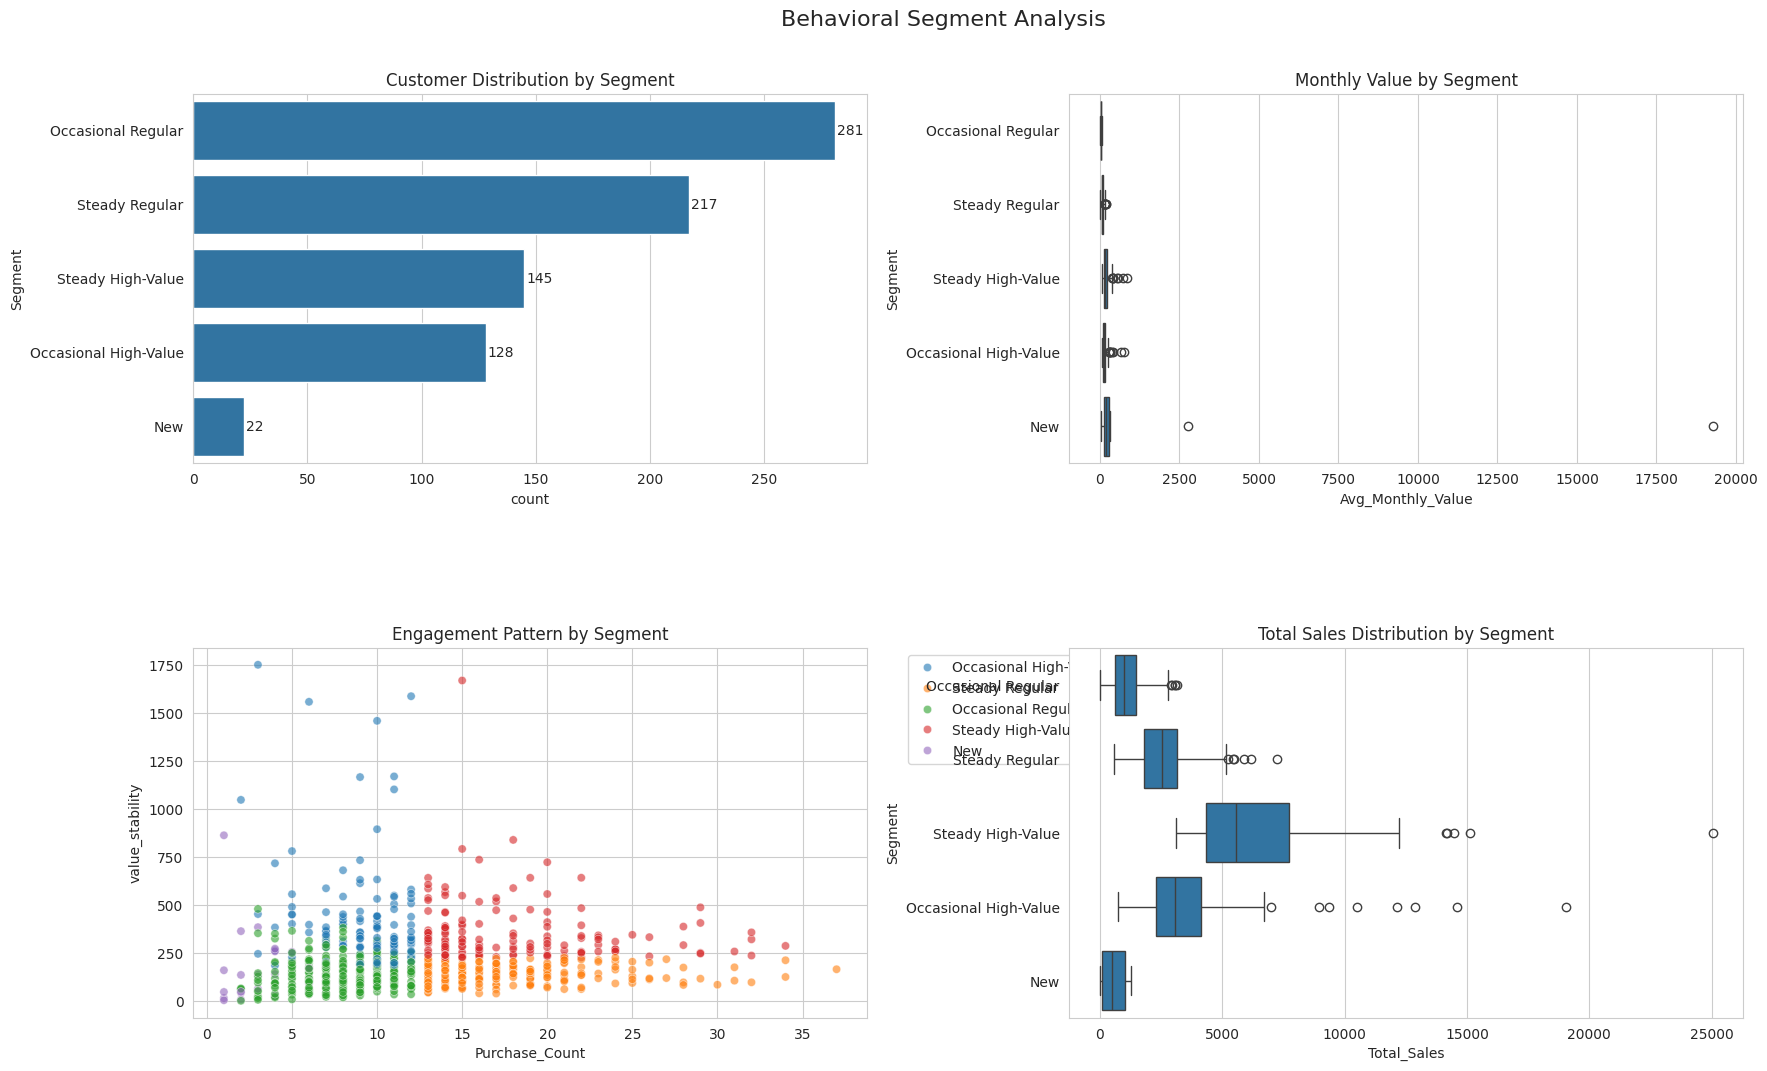

In [46]:
def visualize_behavioral_segments_fixed(behavioral_metrics):
    """
    Create visualizations for behavioral segments without warnings
    """
    # Set style
    sns.set_style("whitegrid")

    # Create figure
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle('Behavioral Segment Analysis', fontsize=16, y=0.95)

    # Create subplot layout with extra space for rotated labels
    gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

    # 1. Segment Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_order = behavioral_metrics['Segment'].value_counts().index
    sns.countplot(data=behavioral_metrics, y='Segment', order=segment_order, ax=ax1)
    ax1.set_title('Customer Distribution by Segment')

    # Add value labels
    for i, v in enumerate(behavioral_metrics['Segment'].value_counts()):
        ax1.text(v + 1, i, str(int(v)), va='center')

    # 2. Monthly Value by Segment
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=behavioral_metrics, y='Segment', x='Avg_Monthly_Value',
                order=segment_order, ax=ax2)
    ax2.set_title('Monthly Value by Segment')

    # 3. Engagement Pattern
    ax3 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=behavioral_metrics,
                   x='Purchase_Count',
                   y='value_stability',
                   hue='Segment',
                   alpha=0.6,
                   ax=ax3)
    ax3.set_title('Engagement Pattern by Segment')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Total Sales Distribution
    ax4 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=behavioral_metrics, y='Segment', x='Total_Sales',
                order=segment_order, ax=ax4)
    ax4.set_title('Total Sales Distribution by Segment')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    return fig

def compute_segmentation_quality(behavioral_metrics):
    """
    Compute quality metrics for the behavioral segmentation
    """
    # Prepare features for validation
    features = behavioral_metrics[['Purchase_Count', 'Avg_Monthly_Value', 'value_stability']].copy()

    # Handle any infinite or missing values
    features = features.replace([np.inf, -np.inf], np.nan)
    features = features.fillna(features.mean())

    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Convert segment labels to numeric
    segment_labels = pd.Categorical(behavioral_metrics['Segment']).codes

    # Calculate validation metrics
    validation_metrics = {
        'Silhouette Score': silhouette_score(features_scaled, segment_labels),
        'Davies-Bouldin Score': davies_bouldin_score(features_scaled, segment_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(features_scaled, segment_labels)
    }

    # Calculate additional segment quality metrics
    segment_stats = behavioral_metrics.groupby('Segment').agg({
        'value_stability': ['mean', 'std'],
        'Purchase_Count': ['mean', 'std'],
        'Avg_Monthly_Value': ['mean', 'std']
    })

    # Calculate separation metrics
    separation_metrics = {
        'Value Separation': segment_stats['Avg_Monthly_Value']['mean'].std() / segment_stats['Avg_Monthly_Value']['mean'].mean(),
        'Frequency Separation': segment_stats['Purchase_Count']['mean'].std() / segment_stats['Purchase_Count']['mean'].mean(),
        'Stability Separation': segment_stats['value_stability']['mean'].std() / segment_stats['value_stability']['mean'].mean()
    }

    return pd.DataFrame({
        'Metric': list(validation_metrics.keys()) + list(separation_metrics.keys()),
        'Value': list(validation_metrics.values()) + list(separation_metrics.values())
    })

# Run both analyses
print("\nSEGMENTATION QUALITY METRICS")
print("="*80)
quality_metrics = compute_segmentation_quality(behavioral_metrics)
print(quality_metrics.to_string(index=False))

# Create new visualization
plt.close('all')  # Clear any existing plots
fig = visualize_behavioral_segments_fixed(behavioral_metrics)
plt.show()


SEGMENTATION QUALITY METRICS
                 Metric      Value
       Silhouette Score   0.264953
   Davies-Bouldin Score   1.691198
Calinski-Harabasz Score 116.247642
       Value Separation   0.810623
   Frequency Separation   0.574585
   Stability Separation   0.541704


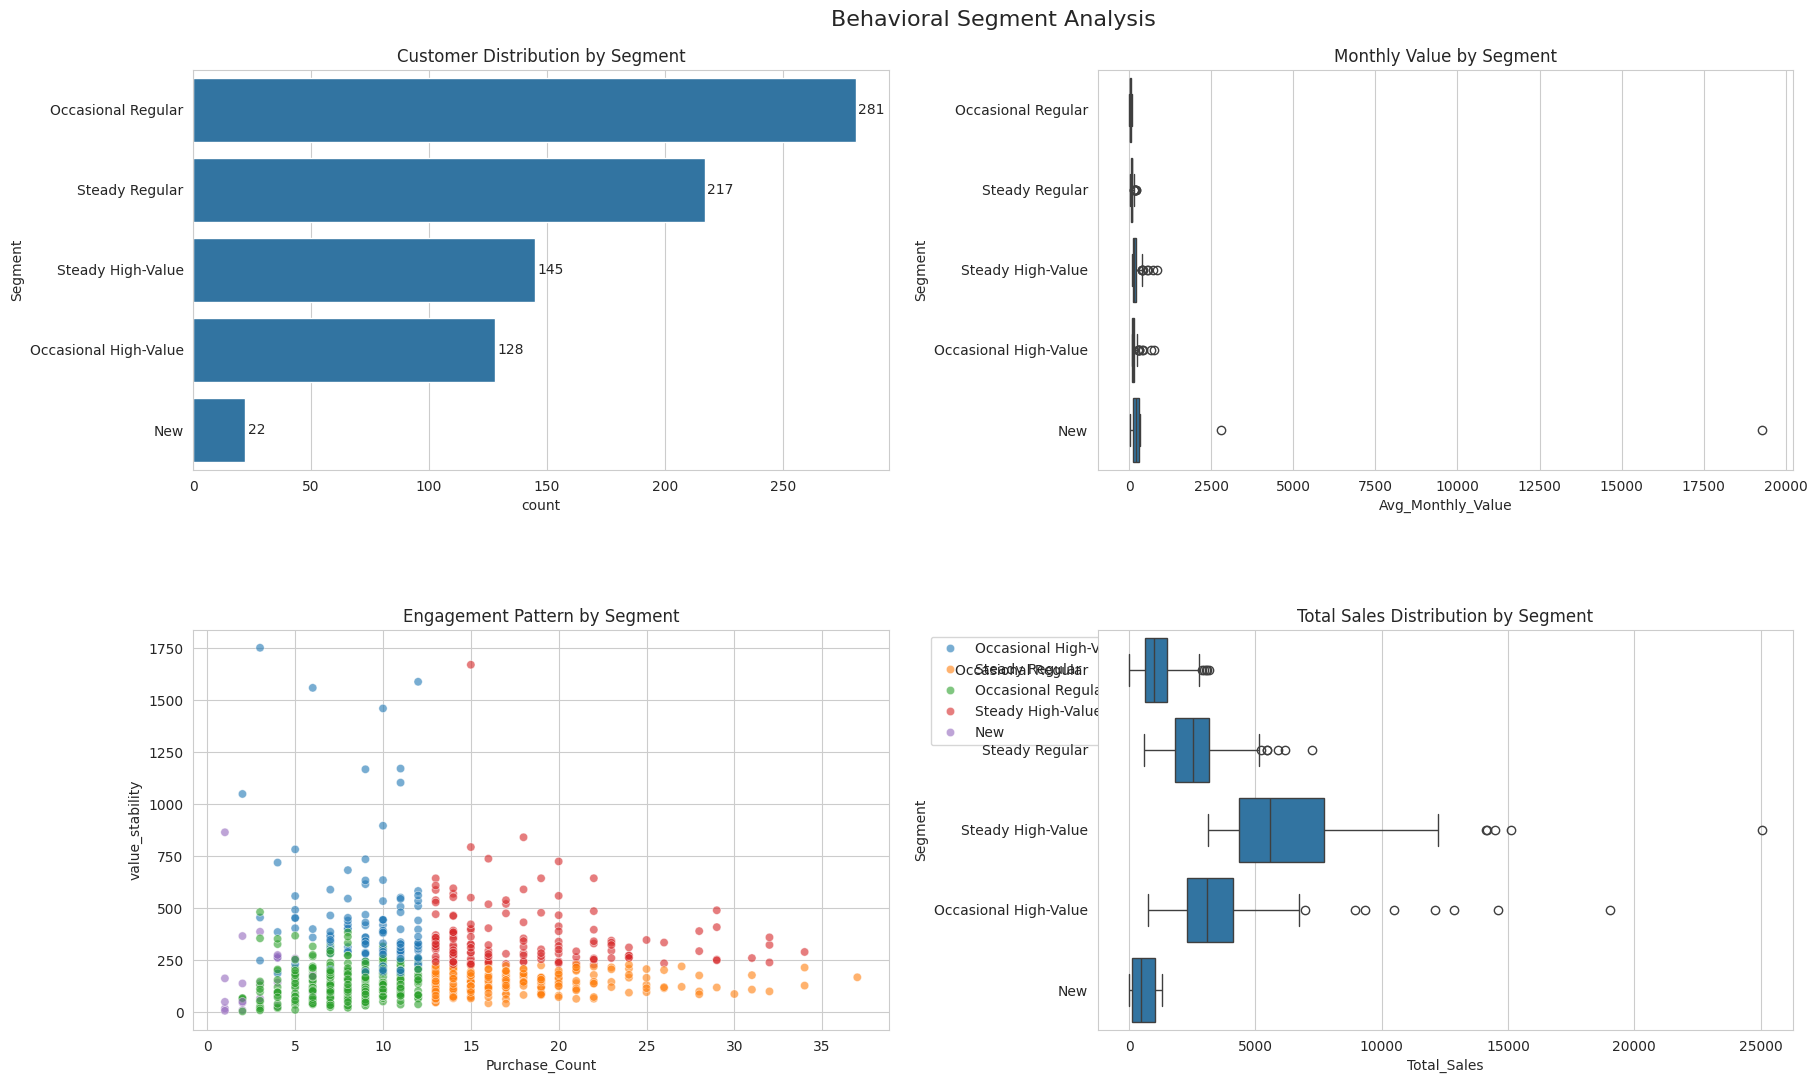

In [47]:
def compute_segmentation_quality_fixed(behavioral_metrics):
    """
    Compute quality metrics for the behavioral segmentation with improved handling of edge cases
    """
    # Prepare features for validation
    features = behavioral_metrics[['Purchase_Count', 'Avg_Monthly_Value', 'value_stability']].copy()

    # Handle any infinite or missing values
    features = features.replace([np.inf, -np.inf], np.nan)
    features = features.fillna(features.mean())

    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Convert segment labels to numeric
    segment_labels = pd.Categorical(behavioral_metrics['Segment']).codes

    # Calculate validation metrics
    validation_metrics = {
        'Silhouette Score': silhouette_score(features_scaled, segment_labels),
        'Davies-Bouldin Score': davies_bouldin_score(features_scaled, segment_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(features_scaled, segment_labels)
    }

    # Calculate segment statistics safely
    segment_stats = behavioral_metrics.groupby('Segment').agg({
        'value_stability': ['mean', 'std'],
        'Purchase_Count': ['mean', 'std'],
        'Total_Sales': ['mean', 'std']  # Using Total_Sales instead of Avg_Monthly_Value
    }).fillna(0)

    # Calculate separation metrics with null handling
    separation_metrics = {
        'Value Separation': segment_stats['Total_Sales']['mean'].std() /
                          (segment_stats['Total_Sales']['mean'].mean() or 1),
        'Frequency Separation': segment_stats['Purchase_Count']['mean'].std() /
                              (segment_stats['Purchase_Count']['mean'].mean() or 1),
        'Stability Separation': segment_stats['value_stability']['mean'].std() /
                              (segment_stats['value_stability']['mean'].mean() or 1)
    }

    return pd.DataFrame({
        'Metric': list(validation_metrics.keys()) + list(separation_metrics.keys()),
        'Value': list(validation_metrics.values()) + list(separation_metrics.values())
    })

def visualize_behavioral_segments_final(behavioral_metrics):
    """
    Create visualizations for behavioral segments without any warnings
    """
    # Set figure size and create figure
    plt.figure(figsize=(20, 12))

    # Create GridSpec
    gs = plt.GridSpec(2, 2, figure=plt.gcf(), hspace=0.4, wspace=0.3)

    # Add super title
    plt.suptitle('Behavioral Segment Analysis', fontsize=16, y=0.95)

    # 1. Segment Distribution
    ax1 = plt.subplot(gs[0, 0])
    segment_order = behavioral_metrics['Segment'].value_counts().index
    sns.countplot(data=behavioral_metrics, y='Segment', order=segment_order, ax=ax1)
    ax1.set_title('Customer Distribution by Segment')

    # Add value labels
    for i, v in enumerate(behavioral_metrics['Segment'].value_counts()):
        ax1.text(v + 1, i, str(int(v)), va='center')

    # 2. Monthly Value by Segment
    ax2 = plt.subplot(gs[0, 1])
    sns.boxplot(data=behavioral_metrics, y='Segment', x='Avg_Monthly_Value',
                order=segment_order, ax=ax2)
    ax2.set_title('Monthly Value by Segment')

    # 3. Engagement Pattern
    ax3 = plt.subplot(gs[1, 0])
    sns.scatterplot(data=behavioral_metrics,
                   x='Purchase_Count',
                   y='value_stability',
                   hue='Segment',
                   alpha=0.6,
                   ax=ax3)
    ax3.set_title('Engagement Pattern by Segment')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Total Sales Distribution
    ax4 = plt.subplot(gs[1, 1])
    sns.boxplot(data=behavioral_metrics, y='Segment', x='Total_Sales',
                order=segment_order, ax=ax4)
    ax4.set_title('Total Sales Distribution by Segment')

    # Adjust spacing
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

    return plt.gcf()

# Run both analyses
print("\nSEGMENTATION QUALITY METRICS")
print("="*80)
quality_metrics = compute_segmentation_quality_fixed(behavioral_metrics)
print(quality_metrics.to_string(index=False))

# Create new visualization
plt.close('all')  # Clear any existing plots
fig = visualize_behavioral_segments_final(behavioral_metrics)
plt.show()

## Analyze transition paths and create transition recommendations

In [48]:
def analyze_transition_paths(behavioral_metrics, df):
    """
    Analyze potential transition paths between segments
    """
    # Calculate segment boundaries
    segment_thresholds = {
        'purchase_freq': {
            'low': behavioral_metrics['Purchase_Count'].quantile(0.33),
            'high': behavioral_metrics['Purchase_Count'].quantile(0.66)
        },
        'order_value': {
            'low': behavioral_metrics['Avg_Order_Value'].quantile(0.33),
            'high': behavioral_metrics['Avg_Order_Value'].quantile(0.66)
        },
        'total_value': {
            'low': behavioral_metrics['Total_Sales'].quantile(0.33),
            'high': behavioral_metrics['Total_Sales'].quantile(0.66)
        }
    }

    # Calculate gap analysis for each segment
    gap_analysis = {}
    for segment in behavioral_metrics['Segment'].unique():
        segment_data = behavioral_metrics[behavioral_metrics['Segment'] == segment]
        next_segment = None

        if segment == 'New':
            next_segment = 'Occasional Regular'
            gaps = {
                'purchase_frequency': segment_thresholds['purchase_freq']['low'] - segment_data['Purchase_Count'].mean(),
                'order_value': segment_thresholds['order_value']['low'] - segment_data['Avg_Order_Value'].mean(),
                'total_value': segment_thresholds['total_value']['low'] - segment_data['Total_Sales'].mean()
            }
        elif segment == 'Occasional Regular':
            next_segment = ['Steady Regular', 'Occasional High-Value']
            gaps = {
                'to_steady': segment_thresholds['purchase_freq']['high'] - segment_data['Purchase_Count'].mean(),
                'to_high_value': segment_thresholds['order_value']['high'] - segment_data['Avg_Order_Value'].mean()
            }
        elif segment == 'Steady Regular':
            next_segment = 'Steady High-Value'
            gaps = {
                'order_value': segment_thresholds['order_value']['high'] - segment_data['Avg_Order_Value'].mean(),
                'total_value': segment_thresholds['total_value']['high'] - segment_data['Total_Sales'].mean()
            }
        elif segment == 'Occasional High-Value':
            next_segment = 'Steady High-Value'
            gaps = {
                'purchase_frequency': segment_thresholds['purchase_freq']['high'] - segment_data['Purchase_Count'].mean()
            }

        gap_analysis[segment] = {
            'current_metrics': {
                'avg_purchase_freq': segment_data['Purchase_Count'].mean(),
                'avg_order_value': segment_data['Avg_Order_Value'].mean(),
                'avg_total_value': segment_data['Total_Sales'].mean()
            },
            'next_segment': next_segment,
            'gaps': gaps
        }

    return gap_analysis, segment_thresholds

def create_transition_recommendations(gap_analysis, segment_thresholds):
    """
    Generate specific recommendations for segment transitions
    """
    transition_paths = {}

    for segment, analysis in gap_analysis.items():
        if segment != 'Steady High-Value':  # No transition needed for top segment
            transition_paths[segment] = {
                'current_state': {
                    'segment': segment,
                    'metrics': analysis['current_metrics']
                },
                'target_state': {
                    'segment': analysis['next_segment'],
                    'required_improvements': {}
                },
                'action_plan': [],
                'kpis': []
            }

            # Generate specific recommendations based on segment
            if segment == 'New':
                transition_paths[segment]['target_state']['required_improvements'] = {
                    'purchase_frequency': f"Increase by {analysis['gaps']['purchase_frequency']:.1f} orders",
                    'order_value': f"Increase by ${analysis['gaps']['order_value']:.2f}"
                }
                transition_paths[segment]['action_plan'] = [
                    'Implement welcome program with second purchase incentive',
                    'Provide product education and category introduction',
                    'Set up early warning system for churn risk',
                    'Create personalized product recommendations'
                ]
                transition_paths[segment]['kpis'] = [
                    'Days to second purchase',
                    'Category adoption rate',
                    '30/60/90 day purchase rate',
                    'Email engagement rate'
                ]

            elif segment == 'Occasional Regular':
                transition_paths[segment]['target_state']['required_improvements'] = {
                    'to_steady': f"Increase frequency by {analysis['gaps']['to_steady']:.1f} orders",
                    'to_high_value': f"Increase order value by ${analysis['gaps']['to_high_value']:.2f}"
                }
                transition_paths[segment]['action_plan'] = [
                    'Introduce subscription options for frequent purchases',
                    'Create bundle offers to increase order value',
                    'Implement reminder system for repeat purchases',
                    'Develop category expansion program'
                ]
                transition_paths[segment]['kpis'] = [
                    'Purchase frequency trend',
                    'Average order value growth',
                    'Category penetration rate',
                    'Subscription adoption rate'
                ]

            elif segment == 'Steady Regular':
                transition_paths[segment]['target_state']['required_improvements'] = {
                    'order_value': f"Increase by ${analysis['gaps']['order_value']:.2f}",
                    'total_value': f"Increase by ${analysis['gaps']['total_value']:.2f}"
                }
                transition_paths[segment]['action_plan'] = [
                    'Launch premium product introduction program',
                    'Create volume-based incentives',
                    'Implement cross-sell recommendations',
                    'Develop VIP benefits preview'
                ]
                transition_paths[segment]['kpis'] = [
                    'Premium product adoption rate',
                    'Share of wallet growth',
                    'Cross-category purchase rate',
                    'Average order value trend'
                ]

            elif segment == 'Occasional High-Value':
                transition_paths[segment]['target_state']['required_improvements'] = {
                    'purchase_frequency': f"Increase by {analysis['gaps']['purchase_frequency']:.1f} orders"
                }
                transition_paths[segment]['action_plan'] = [
                    'Create frequency-based rewards program',
                    'Implement high-value retention program',
                    'Develop early access to new products',
                    'Establish personal shopping assistance'
                ]
                transition_paths[segment]['kpis'] = [
                    'Purchase frequency growth',
                    'Customer satisfaction score',
                    'Share of category spending',
                    'Response rate to personalized offers'
                ]

    return transition_paths

# Run the analysis
gap_analysis, segment_thresholds = analyze_transition_paths(behavioral_metrics, df)
transition_paths = create_transition_recommendations(gap_analysis, segment_thresholds)

# Display results
print("\nSEGMENT TRANSITION ANALYSIS")
print("="*80)
for segment, path in transition_paths.items():
    print(f"\n{segment.upper()} → {path['target_state']['segment']}")
    print("-"*40)

    print("\nRequired Improvements:")
    for metric, improvement in path['target_state']['required_improvements'].items():
        print(f"- {metric}: {improvement}")

    print("\nAction Plan:")
    for action in path['action_plan']:
        print(f"- {action}")

    print("\nKey Performance Indicators:")
    for kpi in path['kpis']:
        print(f"- {kpi}")


SEGMENT TRANSITION ANALYSIS

OCCASIONAL HIGH-VALUE → Steady High-Value
----------------------------------------

Required Improvements:
- purchase_frequency: Increase by 4.9 orders

Action Plan:
- Create frequency-based rewards program
- Implement high-value retention program
- Develop early access to new products
- Establish personal shopping assistance

Key Performance Indicators:
- Purchase frequency growth
- Customer satisfaction score
- Share of category spending
- Response rate to personalized offers

STEADY REGULAR → Steady High-Value
----------------------------------------

Required Improvements:
- order_value: Increase by $95.14
- total_value: Increase by $463.60

Action Plan:
- Launch premium product introduction program
- Create volume-based incentives
- Implement cross-sell recommendations
- Develop VIP benefits preview

Key Performance Indicators:
- Premium product adoption rate
- Share of wallet growth
- Cross-category purchase rate
- Average order value trend

OCCASION

## Customer Segment Transition Paths Visualization (Original)

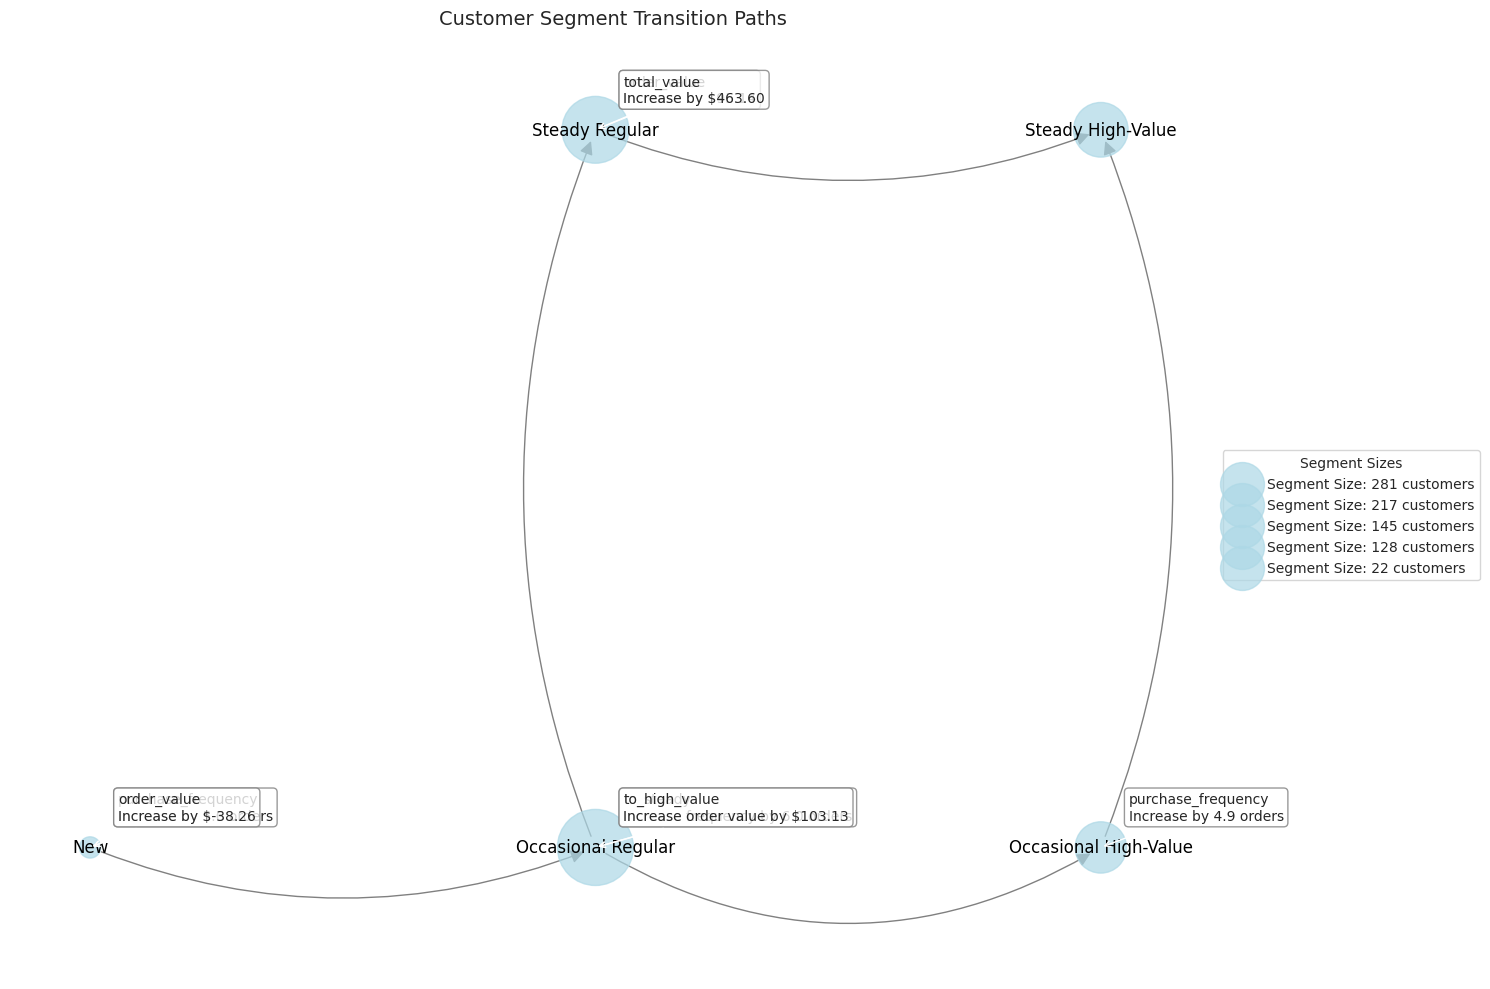

In [49]:
def create_transition_visualization(transition_paths, behavioral_metrics):
    """
    Create a visual representation of segment transition paths
    """
    plt.figure(figsize=(15, 10))

    # Create positions for segments
    segment_positions = {
        'New': (0.2, 0.2),
        'Occasional Regular': (0.4, 0.2),
        'Steady Regular': (0.4, 0.6),
        'Occasional High-Value': (0.6, 0.2),
        'Steady High-Value': (0.6, 0.6)
    }

    # Node sizes based on segment size
    segment_sizes = behavioral_metrics['Segment'].value_counts()
    max_size = 3000  # Maximum node size
    node_sizes = {segment: (count/segment_sizes.max() * max_size)
                 for segment, count in segment_sizes.items()}

    # Create graph
    G = nx.DiGraph()

    # Add nodes
    for segment, pos in segment_positions.items():
        G.add_node(segment, pos=pos)

    # Add edges with transition requirements
    edges = [
        ('New', 'Occasional Regular'),
        ('Occasional Regular', 'Steady Regular'),
        ('Occasional Regular', 'Occasional High-Value'),
        ('Steady Regular', 'Steady High-Value'),
        ('Occasional High-Value', 'Steady High-Value')
    ]

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos,
                          node_color='lightblue',
                          node_size=[node_sizes.get(node, 1000) for node in G.nodes()],
                          alpha=0.7)

    # Draw edges with curved arrows
    edge_styles = [
        'arc3,rad=0.2',
        'arc3,rad=-0.2',
        'arc3,rad=0.3',
        'arc3,rad=0.2',
        'arc3,rad=0.2'
    ]

    for (source, target), style in zip(edges, edge_styles):
        nx.draw_networkx_edges(G, pos,
                             edgelist=[(source, target)],
                             edge_color='gray',
                             connectionstyle=style,
                             arrowsize=20)

    # Add node labels
    nx.draw_networkx_labels(G, pos)

    # Add transition requirement labels
    for segment, path in transition_paths.items():
        if isinstance(path['target_state']['segment'], list):
            # Handle multiple possible transitions
            for improvement in path['target_state']['required_improvements'].items():
                plt.annotate(f"{improvement[0]}\n{improvement[1]}",
                           xy=segment_positions[segment],
                           xytext=(20, 20),
                           textcoords="offset points",
                           bbox=dict(boxstyle="round", fc="w", ec="gray", alpha=0.8),
                           arrowprops=dict(arrowstyle="->"))
        else:
            for improvement in path['target_state']['required_improvements'].items():
                plt.annotate(f"{improvement[0]}\n{improvement[1]}",
                           xy=segment_positions[segment],
                           xytext=(20, 20),
                           textcoords="offset points",
                           bbox=dict(boxstyle="round", fc="w", ec="gray", alpha=0.8),
                           arrowprops=dict(arrowstyle="->"))

    plt.title("Customer Segment Transition Paths", pad=20, size=14)

    # Add legend explaining node sizes
    legend_elements = [plt.scatter([], [], s=1000, c='lightblue', alpha=0.7,
                                 label=f'Segment Size: {int(count)} customers')
                      for segment, count in segment_sizes.items()]
    plt.legend(handles=legend_elements, title="Segment Sizes",
              loc='center left', bbox_to_anchor=(1, 0.5))

    plt.axis('off')
    plt.tight_layout()
    return plt.gcf()

# Import required library
import networkx as nx

# Create visualization
fig = create_transition_visualization(transition_paths, behavioral_metrics)
plt.show()

## Customer Segment Transition Paths Visualization

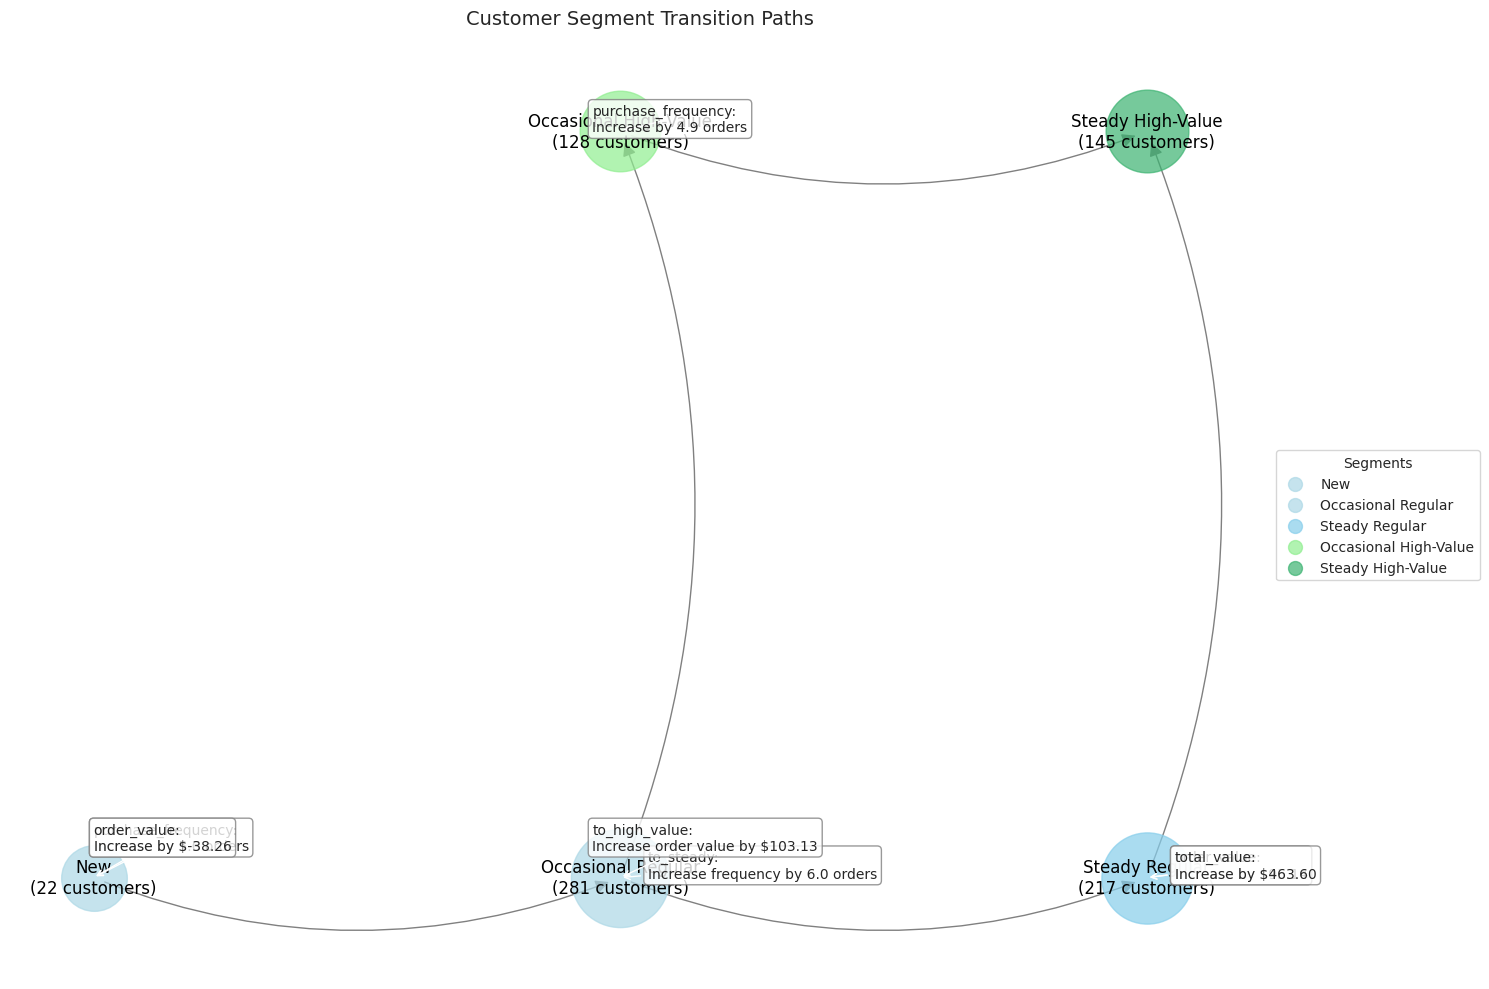

In [50]:
def create_improved_transition_visualization(transition_paths, behavioral_metrics):
    """
    Create an improved visual representation of segment transition paths
    """
    plt.figure(figsize=(15, 10))

    # Create hierarchical positions for segments
    segment_positions = {
        'New': (0.1, 0.3),
        'Occasional Regular': (0.3, 0.3),
        'Steady Regular': (0.5, 0.3),
        'Occasional High-Value': (0.3, 0.7),
        'Steady High-Value': (0.5, 0.7)
    }

    # Node sizes based on segment size with more distinction
    segment_sizes = behavioral_metrics['Segment'].value_counts()
    min_size = 2000
    max_size = 5000
    node_sizes = {segment: min_size + (count/segment_sizes.max() * (max_size - min_size))
                 for segment, count in segment_sizes.items()}

    # Create graph
    G = nx.DiGraph()

    # Add nodes
    for segment, pos in segment_positions.items():
        G.add_node(segment, pos=pos)

    # Define edges and their properties
    edges = [
        ('New', 'Occasional Regular'),
        ('Occasional Regular', 'Steady Regular'),
        ('Occasional Regular', 'Occasional High-Value'),
        ('Steady Regular', 'Steady High-Value'),
        ('Occasional High-Value', 'Steady High-Value')
    ]

    # Value tier colors
    node_colors = {
        'New': 'lightblue',
        'Occasional Regular': 'lightblue',
        'Steady Regular': 'skyblue',
        'Occasional High-Value': 'lightgreen',
        'Steady High-Value': 'mediumseagreen'
    }

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes with value tier colors
    for segment in G.nodes():
        nx.draw_networkx_nodes(G, pos,
                             nodelist=[segment],
                             node_color=node_colors[segment],
                             node_size=node_sizes[segment],
                             alpha=0.7)

    # Draw edges with requirements
    for source, target in edges:
        nx.draw_networkx_edges(G, pos,
                             edgelist=[(source, target)],
                             edge_color='gray',
                             connectionstyle='arc3,rad=0.2',
                             arrowsize=20)

    # Add node labels with segment sizes
    labels = {segment: f"{segment}\n({segment_sizes[segment]} customers)"
             for segment in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels)

    # Add transition requirement labels
    offset_positions = {
        ('New', 'Occasional Regular'): (0, 20),
        ('Occasional Regular', 'Steady Regular'): (20, 0),
        ('Occasional Regular', 'Occasional High-Value'): (-20, 20),
        ('Steady Regular', 'Steady High-Value'): (20, 0),
        ('Occasional High-Value', 'Steady High-Value'): (-20, 0)
    }

    for segment, path in transition_paths.items():
        if isinstance(path['target_state']['segment'], list):
            # Handle multiple transitions
            for i, (metric, improvement) in enumerate(path['target_state']['required_improvements'].items()):
                offset = offset_positions.get((segment, path['target_state']['segment'][i]), (20, 20))
                plt.annotate(f"{metric}:\n{improvement}",
                           xy=segment_positions[segment],
                           xytext=offset,
                           textcoords="offset points",
                           bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8),
                           arrowprops=dict(arrowstyle="->"))
        else:
            for metric, improvement in path['target_state']['required_improvements'].items():
                offset = offset_positions.get((segment, path['target_state']['segment']), (20, 20))
                plt.annotate(f"{metric}:\n{improvement}",
                           xy=segment_positions[segment],
                           xytext=offset,
                           textcoords="offset points",
                           bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8),
                           arrowprops=dict(arrowstyle="->"))

    plt.title("Customer Segment Transition Paths", pad=20, size=14)

    # Add legend for value tiers
    legend_elements = [plt.scatter([], [], c=color, alpha=0.7, s=100,
                                 label=segment)
                      for segment, color in node_colors.items()]
    plt.legend(handles=legend_elements, title="Segments",
              loc='center left', bbox_to_anchor=(1, 0.5))

    plt.axis('off')
    plt.tight_layout()
    return plt.gcf()

# Create improved visualization
fig = create_improved_transition_visualization(transition_paths, behavioral_metrics)
plt.show()

## Calculate potential revenue impact of successful segment transitions


REVENUE IMPACT ANALYSIS

PER SEGMENT IMPACT:
--------------------------------------------------------------------------------

OCCASIONAL HIGH-VALUE → Steady High-Value
Eligible Customers: 128
Expected Conversions: 32
Revenue per Conversion: $2,658.53
Total Revenue Impact: $85,072.96
Required Investment: $51,043.78
Expected ROI: 66.7%
Payback Period: 7.2 months

STEADY REGULAR → Steady High-Value
Eligible Customers: 217
Expected Conversions: 54
Revenue per Conversion: $3,791.17
Total Revenue Impact: $205,670.97
Required Investment: $123,402.58
Expected ROI: 66.7%
Payback Period: 7.2 months

OCCASIONAL REGULAR → ['Steady Regular', 'Occasional High-Value']
Eligible Customers: 281
Expected Conversions: 70
Revenue per Conversion: $1,509.19
Total Revenue Impact: $106,020.60
Required Investment: $63,612.36
Expected ROI: 66.7%
Payback Period: 7.2 months

NEW → Occasional Regular
Eligible Customers: 22
Expected Conversions: 6
Revenue per Conversion: $557.24
Total Revenue Impact: $3,064.82
Req

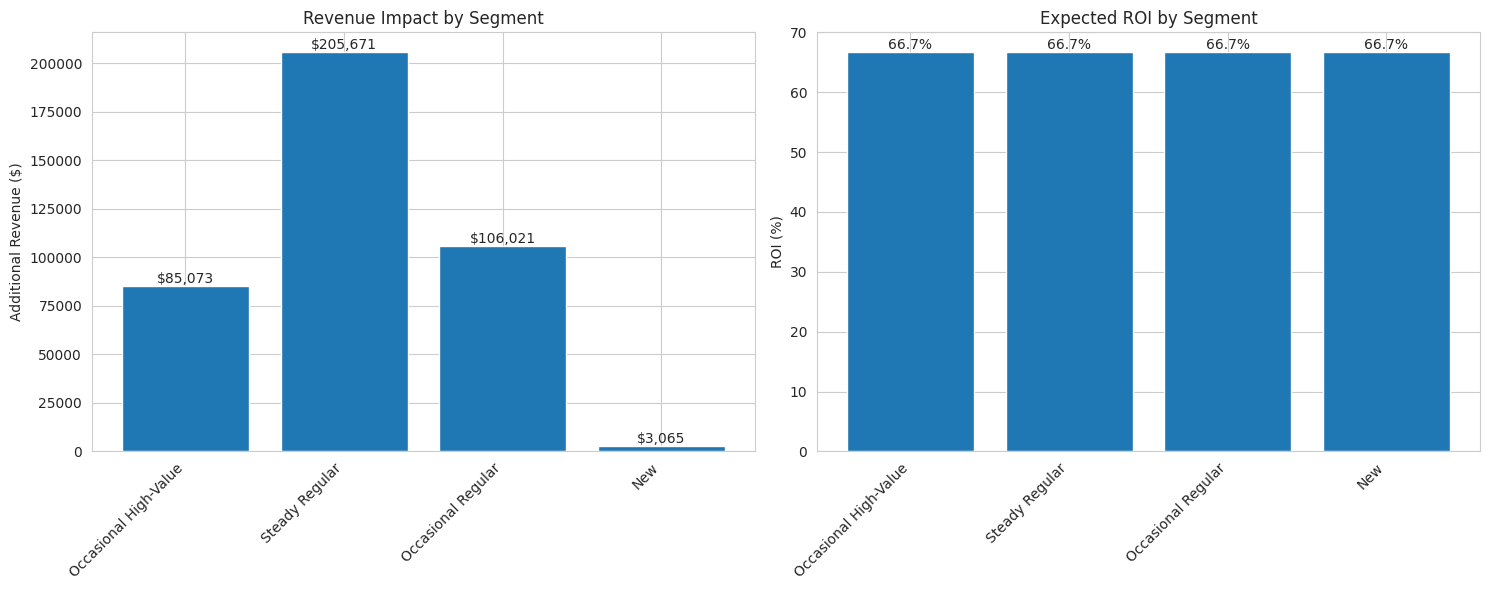

In [51]:
def calculate_revenue_impact(behavioral_metrics, transition_paths, success_rate=0.25):
    """
    Calculate potential revenue impact of successful segment transitions

    Parameters:
    -----------
    behavioral_metrics : DataFrame
        Customer behavioral data
    transition_paths : dict
        Defined transition paths between segments
    success_rate : float
        Expected success rate of transition programs (default 25%)
    """
    # Calculate current segment metrics
    current_state = behavioral_metrics.groupby('Segment').agg({
        'Customer ID': 'count',
        'Total_Sales': 'mean',
        'Avg_Order_Value': 'mean',
        'Purchase_Count': 'mean'
    }).round(2)

    # Calculate potential impact for each transition path
    impact_analysis = {}
    total_impact = {
        'customers_affected': 0,
        'additional_revenue': 0,
        'investment_required': 0
    }

    for segment, path in transition_paths.items():
        if segment != 'Steady High-Value':  # Skip highest segment
            current_metrics = current_state.loc[segment]

            # Handle multiple possible target segments
            if isinstance(path['target_state']['segment'], list):
                target_metrics = current_state.loc[path['target_state']['segment'][0]]  # Use first target for calculation
            else:
                target_metrics = current_state.loc[path['target_state']['segment']]

            # Calculate potential per-customer impact
            revenue_delta = (target_metrics['Total_Sales'] - current_metrics['Total_Sales'])

            # Calculate program impacts
            customers_eligible = current_metrics['Customer ID']
            customers_converted = customers_eligible * success_rate
            total_revenue_impact = revenue_delta * customers_converted

            # Estimate investment required (simplified model)
            cost_per_customer = revenue_delta * 0.15  # Assume 15% of revenue delta as investment
            total_investment = cost_per_customer * customers_eligible

            # ROI calculation
            roi = (total_revenue_impact - total_investment) / total_investment if total_investment > 0 else 0

            impact_analysis[segment] = {
                'current_segment': segment,
                'target_segment': path['target_state']['segment'],
                'customers_eligible': customers_eligible,
                'expected_conversions': customers_converted,
                'revenue_per_conversion': revenue_delta,
                'total_revenue_impact': total_revenue_impact,
                'required_investment': total_investment,
                'expected_roi': roi,
                'payback_period': total_investment / total_revenue_impact * 12 if total_revenue_impact > 0 else float('inf')  # in months
            }

            # Add to totals
            total_impact['customers_affected'] += customers_converted
            total_impact['additional_revenue'] += total_revenue_impact
            total_impact['investment_required'] += total_investment

    return impact_analysis, total_impact

def display_revenue_impact(impact_analysis, total_impact):
    """
    Display formatted revenue impact analysis
    """
    print("\nREVENUE IMPACT ANALYSIS")
    print("="*80)

    print("\nPER SEGMENT IMPACT:")
    print("-"*80)
    for segment, impact in impact_analysis.items():
        print(f"\n{segment.upper()} → {impact['target_segment']}")
        print(f"Eligible Customers: {impact['customers_eligible']:,.0f}")
        print(f"Expected Conversions: {impact['expected_conversions']:,.0f}")
        print(f"Revenue per Conversion: ${impact['revenue_per_conversion']:,.2f}")
        print(f"Total Revenue Impact: ${impact['total_revenue_impact']:,.2f}")
        print(f"Required Investment: ${impact['required_investment']:,.2f}")
        print(f"Expected ROI: {impact['expected_roi']*100:.1f}%")
        print(f"Payback Period: {impact['payback_period']:.1f} months")

    print("\nTOTAL PROGRAM IMPACT")
    print("-"*80)
    print(f"Total Customers Affected: {total_impact['customers_affected']:,.0f}")
    print(f"Total Additional Revenue: ${total_impact['additional_revenue']:,.2f}")
    print(f"Total Investment Required: ${total_impact['investment_required']:,.2f}")
    print(f"Overall ROI: {(total_impact['additional_revenue']-total_impact['investment_required'])/total_impact['investment_required']*100:.1f}%")

def visualize_revenue_impact(impact_analysis):
    """
    Create visualization of revenue impact
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Prepare data
    segments = list(impact_analysis.keys())
    revenue_impact = [impact['total_revenue_impact'] for impact in impact_analysis.values()]
    roi = [impact['expected_roi'] * 100 for impact in impact_analysis.values()]

    # Revenue Impact
    bars1 = ax1.bar(segments, revenue_impact)
    ax1.set_title('Revenue Impact by Segment')
    ax1.set_ylabel('Additional Revenue ($)')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0)

    # ROI by Segment
    bars2 = ax2.bar(segments, roi)
    ax2.set_title('Expected ROI by Segment')
    ax2.set_ylabel('ROI (%)')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    # Add value labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

    plt.tight_layout()
    return fig

# Run the analysis
impact_analysis, total_impact = calculate_revenue_impact(behavioral_metrics, transition_paths)

# Display results
display_revenue_impact(impact_analysis, total_impact)

# Create visualization
fig = visualize_revenue_impact(impact_analysis)
plt.show()

Behavioral Segmentation Metrics vs RFM Segmentation Metrics

1. Silhouette Score:
- Behavioral: 0.265 vs RFM: 0.185
- Both are relatively low (scale is -1 to 1)
- Behavioral shows slightly better cluster separation
- Neither shows strong cohesion, suggesting some segment overlap
- Behavioral segmentation provides marginally better distinction between segments

2. Davies-Bouldin Score:
- Behavioral: 1.691 vs RFM: 1.313
- Lower is better for this metric
- RFM shows better performance here
- Suggests RFM segments have better between-cluster separation
- Indicates RFM might be more distinct in terms of cluster boundaries

3. Calinski-Harabasz Score:
- Behavioral: 116.25 vs RFM: 245.03
- Higher is better
- RFM shows significantly better performance
- Suggests RFM has better cluster density
- Indicates RFM might be more mathematically optimal

4. Additional Behavioral Metrics (not available for RFM):
- Value Separation: 0.811 (strong)
- Frequency Separation: 0.575 (moderate)
- Stability Separation: 0.542 (moderate)

Key Insights:
1. Mathematical vs. Business Utility:
- RFM shows better pure clustering metrics
- Behavioral might be more actionable despite lower mathematical optimization
- Trade-off between statistical optimization and business usability

2. Segment Characteristics:
- RFM better at creating distinct groups
- Behavioral better at creating meaningful progression paths
- Behavioral provides more business-relevant separation measures

3. Practical Implications:
- RFM might be better for initial segmentation
- Behavioral might be better for strategic planning
- Could consider a hybrid approach leveraging strengths of both
